In [ ]:
pip install matplotlib seaborn pandas

In [ ]:
pip install imbalanced-learn

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from imblearn.over_sampling import SMOTE
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
path ="/content/drive/MyDrive/botnet_dataset/Provision_PT_838_Security_Camera.csv"
df=pd.read_csv(path)
df.head()

MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000        0.000000e+00          1.000000   
1          1.000000      590.000000        0.000000e+00          1.000000   
2          1.956973      590.000000        5.820000e-11          1.973957   
3          1.000000       60.000000        0.000000e+00          1.000000   
4          1.988608       66.034372        3.599882e+01          1.993149   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      590.000000            0.000000          1.000000      590.000000   
2      590.000000            0.000000          1.991242      590.000000   
3       60.000000            0.000000          1.000000       60.000000   
4       66.020623           35.999575          1.997711       66.006874   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000          60.0   
1            0.000000     1.000000  ...        1.000000         590.0   
2            0.000000     1.956973  ...        1.973957         590.0   
3            0.000000     1.000000  ...        1.000000          60.0   
4           35.999953     1.988608  ...        1.000000          72.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0          0.0                 0.0          0.0        1.000000          60.0   
1          0.0                 0.0          0.0        1.000000         590.0   
2          0.0                 0.0          0.0        1.991242         590.0   
3          0.0                 0.0          0.0        1.000000          60.0   
4          0.0                 0.0          0.0        1.000000          72.0   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          0.0                 0.0          0.0  
1          0.0                 0.0          0.0  
2          0.0                 0.0          0.0  
3          0.0                 0.0          0.0  
4          0.0                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
print(df.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean',
       'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance',
       'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_covariance',
       'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std',
       'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean',
       'HH_L1_std', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_jit_L5_weight',
       'HH_jit_L5_mean', 'HH_jit_L5_variance', 'HH_jit_L3_weight',
       'HH_jit_L3_mean', 'HH_jit_L3_variance', 'HH_jit_L1_weight',
       'HH_jit_L1_mean', 'HH_jit_L1_variance', 'HpHp_L5_weight',
       'HpHp_L5_mean', 'HpHp_L5_std', 'HpHp_L5_covariance', 'HpHp_L5_pcc',
       'HpHp_L3_weight', 'HpHp_L3_mean', 'HpHp_L3_std', 'HpHp_L3_covariance',
       'HpHp_L3_pcc', 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
MI_dir_L5_weight      0
MI_dir_L5_mean        0
MI_dir_L5_variance    0
MI_dir_L3_weight      0
MI_dir_L3_mean        0
MI_dir_L3_variance    0
MI_dir_L1_weight      0
MI_dir_L1_mean        0
MI_dir_L1_variance    0
H_L5_weight           0
H_L5_mean             0
H_L5_variance         0
H_L3_weight           0
H_L3_mean             0
H_L3_variance         0
H_L1_weight           0
H_L1_mean             0
H_L1_variance         0
HH_L5_weight          0
HH_L5_mean            0
HH_L5_std             0
HH_L5_covariance      0
HH_L5_pcc             0
HH_L3_weight          0
HH_L3_mean            0
HH_L3_std             0
HH_L3_covariance      0
HH_L3_pcc             0
HH_L1_weight          0
HH_L1_mean            0
HH_L1_std             0
HH_L1_covariance      0
HH_L1_pcc             0
HH_jit_L5_weight      0
HH_jit_L5_mean        0
HH_jit_L5_variance    0
HH_jit_L3_weight      0
HH_jit_L3_mean        0
HH_jit_L3_variance    0
HH_jit_L1_weight      0
HH_jit_L1_mean        0

Null values in DataFrame:
       MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0                 False           False               False             False   
1                 False           False               False             False   
2                 False           False               False             False   
3                 False           False               False             False   
4                 False           False               False             False   
...                 ...             ...                 ...               ...   
98509             False           False               False             False   
98510             False           False               False             False   
98511             False           False               False             False   
98512             False           False               False             False   
98513             False           False               False             False   

 

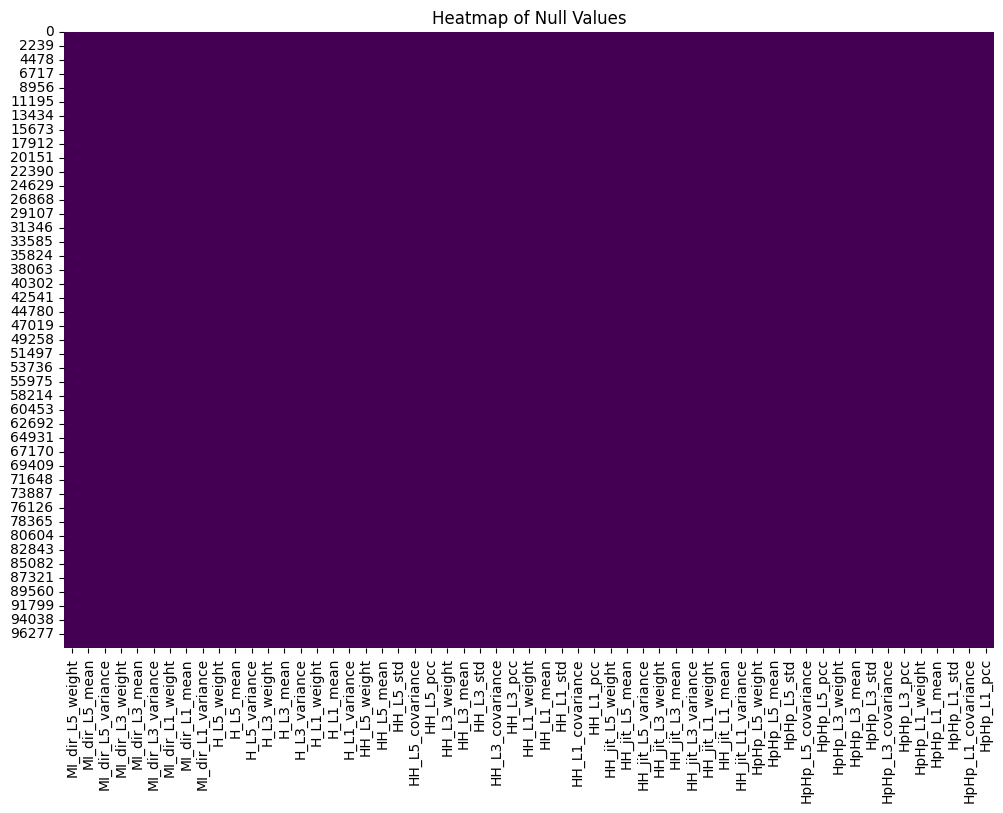

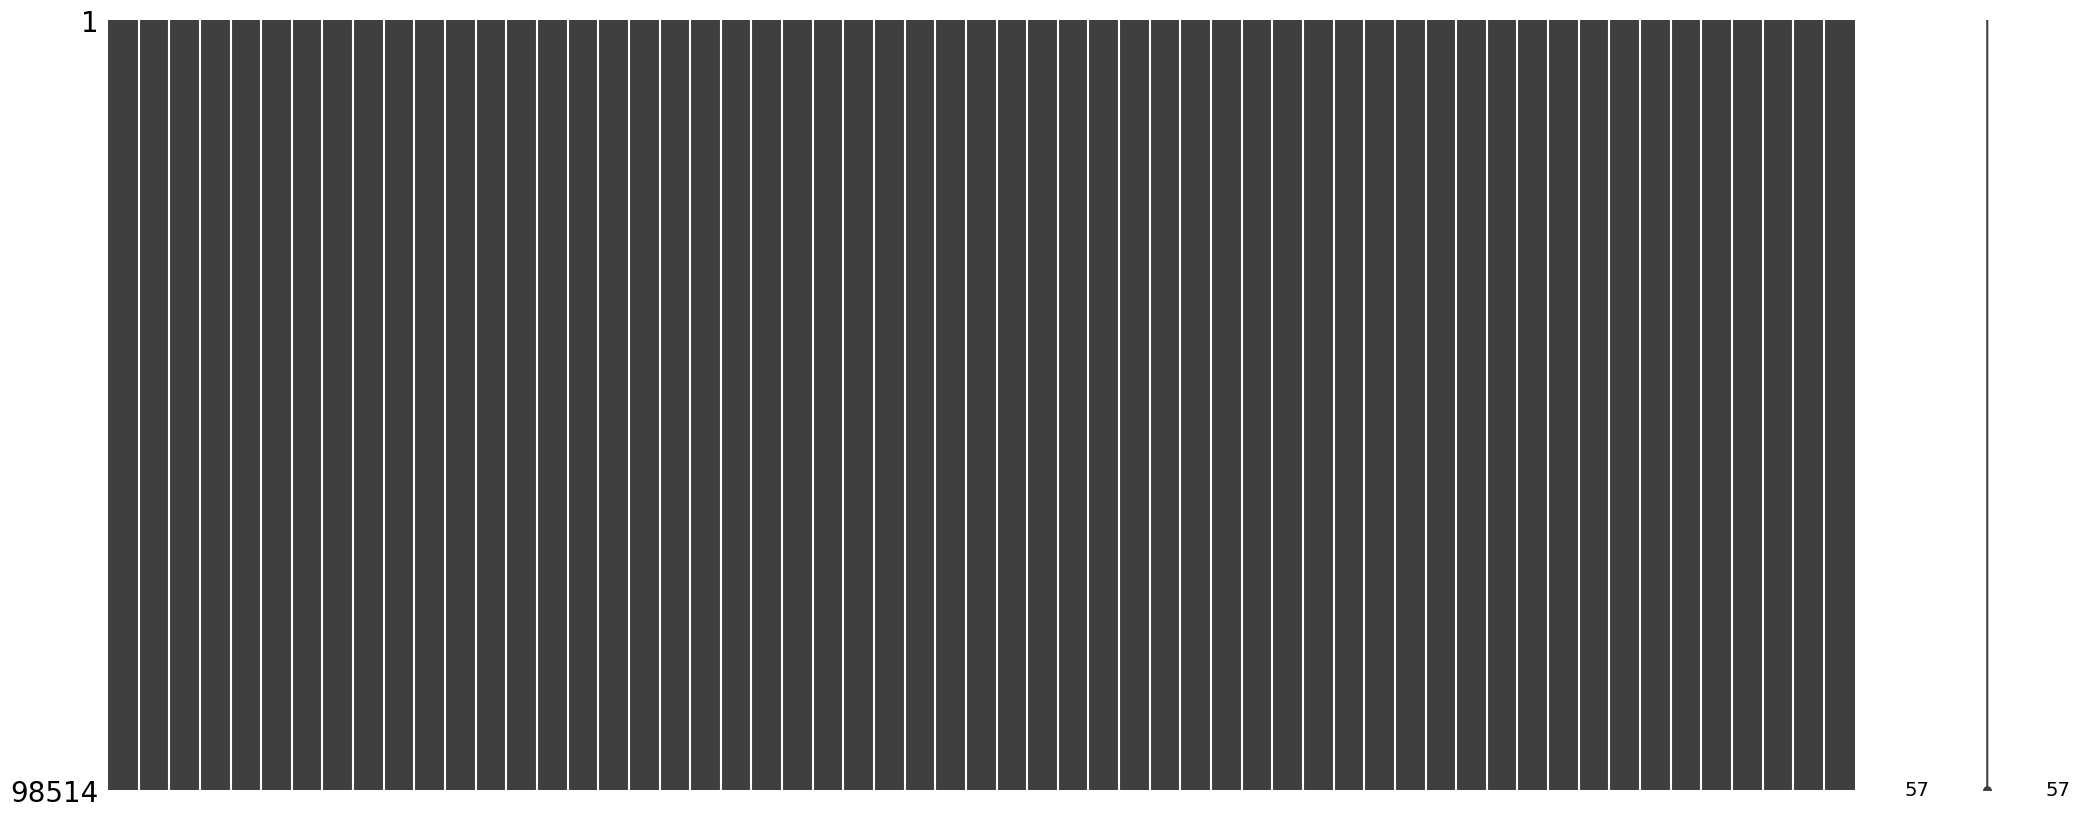

In [ ]:
# Check for null values
print("Null values in DataFrame:")
print(df.isnull())

# Count null values per column
print("\nCount of null values per column:")
print(df.isnull().sum())

# Display rows with null values
print("\nRows with null values:")
print(df[df.isnull().any(axis=1)])

# Visualize null values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Null Values')
plt.show()

# Visualize missing values matrix
msno.matrix(df)
plt.show()

In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
MI_dir_L5_weight      float64
MI_dir_L5_mean        float64
MI_dir_L5_variance    float64
MI_dir_L3_weight      float64
MI_dir_L3_mean        float64
MI_dir_L3_variance    float64
MI_dir_L1_weight      float64
MI_dir_L1_mean        float64
MI_dir_L1_variance    float64
H_L5_weight           float64
H_L5_mean             float64
H_L5_variance         float64
H_L3_weight           float64
H_L3_mean             float64
H_L3_variance         float64
H_L1_weight           float64
H_L1_mean             float64
H_L1_variance         float64
HH_L5_weight          float64
HH_L5_mean            float64
HH_L5_std             float64
HH_L5_covariance      float64
HH_L5_pcc             float64
HH_L3_weight          float64
HH_L3_mean            float64
HH_L3_std             float64
HH_L3_covariance      float64
HH_L3_pcc             float64
HH_L1_weight          float64
HH_L1_mean            float64
HH_L1_std             float64
HH_L1_covariance      float64
HH_L1_pcc    

In [ ]:
max_values = df.max()
min_values = df.min()

print("Maximum values for each feature:")
print(max_values)

print("\nMinimum values for each feature:")
print(min_values)

Maximum values for each feature:
MI_dir_L5_weight      6.726047e+01
MI_dir_L5_mean        8.953365e+02
MI_dir_L5_variance    4.918058e+05
MI_dir_L3_weight      8.615089e+01
MI_dir_L3_mean        7.118446e+02
MI_dir_L3_variance    4.645006e+05
MI_dir_L1_weight      1.150580e+02
MI_dir_L1_mean        5.900000e+02
MI_dir_L1_variance    1.799662e+05
H_L5_weight           6.726047e+01
H_L5_mean             8.953365e+02
H_L5_variance         4.918058e+05
H_L3_weight           8.615089e+01
H_L3_mean             7.118446e+02
H_L3_variance         4.645006e+05
H_L1_weight           1.150580e+02
H_L1_mean             5.900000e+02
H_L1_variance         1.799662e+05
HH_L5_weight          6.705480e+01
HH_L5_mean            1.470000e+03
HH_L5_std             4.300000e+02
HH_L5_covariance      4.556119e+04
HH_L5_pcc             1.082650e+00
HH_L3_weight          8.576397e+01
HH_L3_mean            1.470000e+03
HH_L3_std             4.143844e+02
HH_L3_covariance      4.772426e+04
HH_L3_pcc             

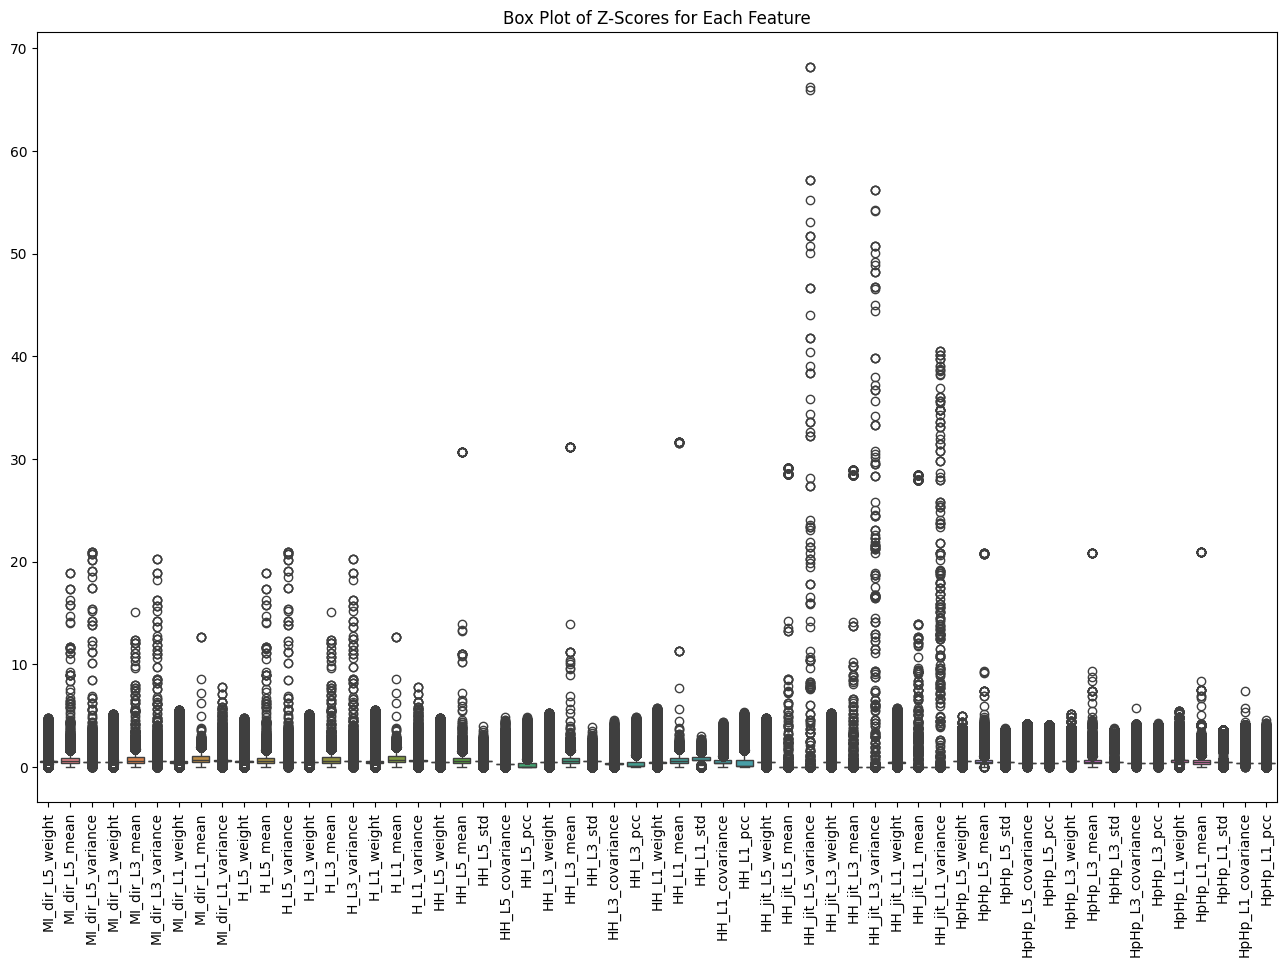

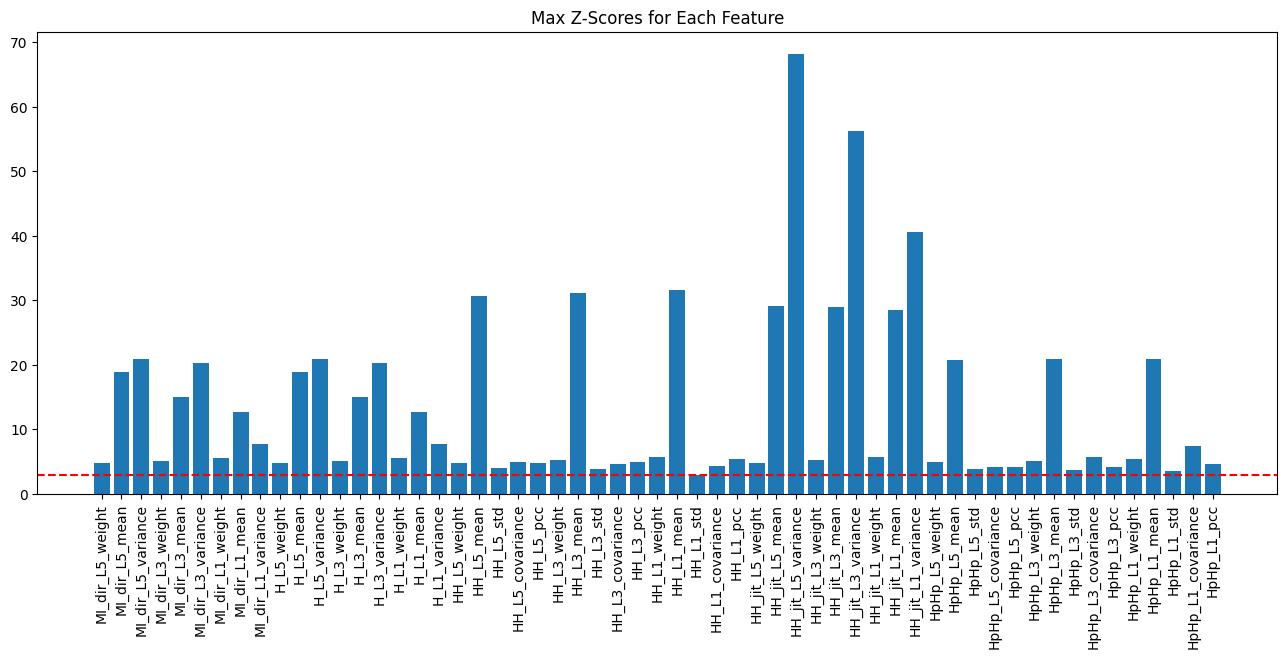

In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)
z_scores_df.head()
# Create a box plot for all features
plt.figure(figsize=(16, 10))  # Adjust the size depending on the number of features
sns.boxplot(data=z_scores_df)
plt.xticks(rotation=90)  # Rotate feature names if necessary
plt.title('Box Plot of Z-Scores for Each Feature')
plt.show()
# Calculate max Z-score for each feature
max_z_scores = z_scores_df.max()

# Plot the max Z-scores for each feature
plt.figure(figsize=(16, 6))
plt.bar(max_z_scores.index, max_z_scores.values)
plt.axhline(y=3, color='r', linestyle='--')  # Outlier threshold
plt.xticks(rotation=90)
plt.title('Max Z-Scores for Each Feature')
plt.show()

In [ ]:
threshold = 3

# Identify outliers for each feature
outliers = (z_scores_df > threshold)

# Display the rows and features that are outliers
outliers_summary = df[outliers.any(axis=1)]
print(f"Number of rows with outliers: {outliers_summary.shape[0]}")

# Display the first few rows with outliers
outliers_summary.head()

Number of rows with outliers: 14519


MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
0          1.000000       60.000000        0.000000e+00          1.000000   
1          1.000000      590.000000        0.000000e+00          1.000000   
2          1.956973      590.000000        5.820000e-11          1.973957   
3          1.000000       60.000000        0.000000e+00          1.000000   
4          1.988608       66.034372        3.599882e+01          1.993149   

   MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
0       60.000000            0.000000          1.000000       60.000000   
1      590.000000            0.000000          1.000000      590.000000   
2      590.000000            0.000000          1.991242      590.000000   
3       60.000000            0.000000          1.000000       60.000000   
4       66.020623           35.999575          1.997711       66.006874   

   MI_dir_L1_variance  H_L5_weight  ...  HpHp_L3_weight  HpHp_L3_mean  \
0            0.000000     1.000000  ...        1.000000          60.0   
1            0.000000     1.000000  ...        1.000000         590.0   
2            0.000000     1.956973  ...        1.973957         590.0   
3            0.000000     1.000000  ...        1.000000          60.0   
4           35.999953     1.988608  ...        1.000000          72.0   

   HpHp_L3_std  HpHp_L3_covariance  HpHp_L3_pcc  HpHp_L1_weight  HpHp_L1_mean  \
0          0.0                 0.0          0.0        1.000000          60.0   
1          0.0                 0.0          0.0        1.000000         590.0   
2          0.0                 0.0          0.0        1.991242         590.0   
3          0.0                 0.0          0.0        1.000000          60.0   
4          0.0                 0.0          0.0        1.000000          72.0   

   HpHp_L1_std  HpHp_L1_covariance  HpHp_L1_pcc  
0          0.0                 0.0          0.0  
1          0.0                 0.0          0.0  
2          0.0                 0.0          0.0  
3          0.0                 0.0          0.0  
4          0.0                 0.0          0.0  

[5 rows x 57 columns]

In [ ]:
# Count of outliers per feature
outlier_counts_per_feature = outliers.sum()

# Print the number of outliers per feature
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

Number of outliers per feature:
MI_dir_L5_weight      3530
MI_dir_L5_mean          94
MI_dir_L5_variance     167
MI_dir_L3_weight      3697
MI_dir_L3_mean          85
MI_dir_L3_variance     150
MI_dir_L1_weight      3654
MI_dir_L1_mean          13
MI_dir_L1_variance     109
H_L5_weight           3530
H_L5_mean               94
H_L5_variance          167
H_L3_weight           3697
H_L3_mean               85
H_L3_variance          150
H_L1_weight           3654
H_L1_mean               13
H_L1_variance          109
HH_L5_weight          3597
HH_L5_mean              56
HH_L5_std                6
HH_L5_covariance       314
HH_L5_pcc             4209
HH_L3_weight          3740
HH_L3_mean              41
HH_L3_std                5
HH_L3_covariance       109
HH_L3_pcc             3793
HH_L1_weight          3745
HH_L1_mean              27
HH_L1_std                0
HH_L1_covariance       278
HH_L1_pcc             2969
HH_jit_L5_weight      3597
HH_jit_L5_mean         156
HH_jit_L5_variance     

Number of outliers per feature:
MI_dir_L5_weight      3530
MI_dir_L5_mean          94
MI_dir_L5_variance     167
MI_dir_L3_weight      3697
MI_dir_L3_mean          85
MI_dir_L3_variance     150
MI_dir_L1_weight      3654
MI_dir_L1_mean          13
MI_dir_L1_variance     109
H_L5_weight           3530
H_L5_mean               94
H_L5_variance          167
H_L3_weight           3697
H_L3_mean               85
H_L3_variance          150
H_L1_weight           3654
H_L1_mean               13
H_L1_variance          109
HH_L5_weight          3597
HH_L5_mean              56
HH_L5_std                6
HH_L5_covariance       314
HH_L5_pcc             4209
HH_L3_weight          3740
HH_L3_mean              41
HH_L3_std                5
HH_L3_covariance       109
HH_L3_pcc             3793
HH_L1_weight          3745
HH_L1_mean              27
HH_L1_std                0
HH_L1_covariance       278
HH_L1_pcc             2969
HH_jit_L5_weight      3597
HH_jit_L5_mean         156
HH_jit_L5_variance     

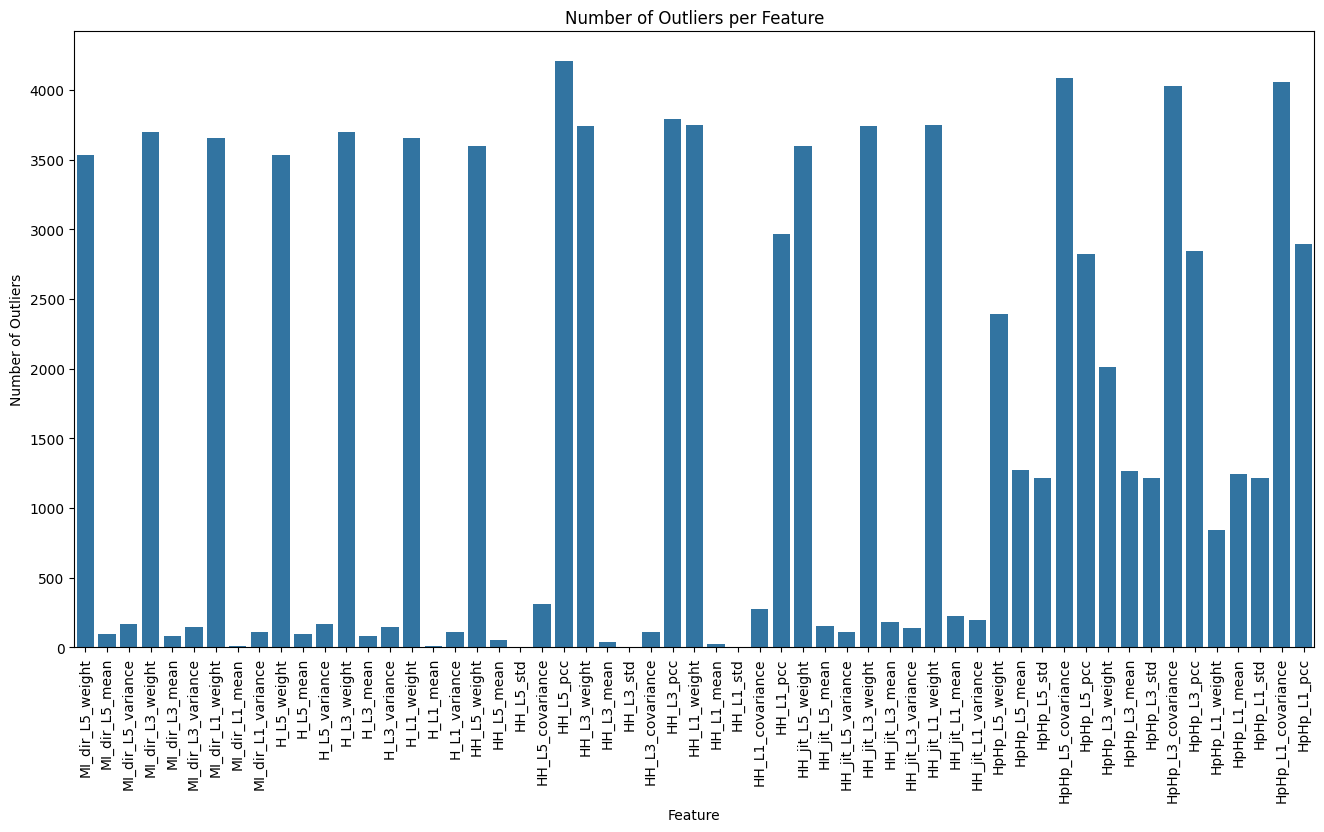

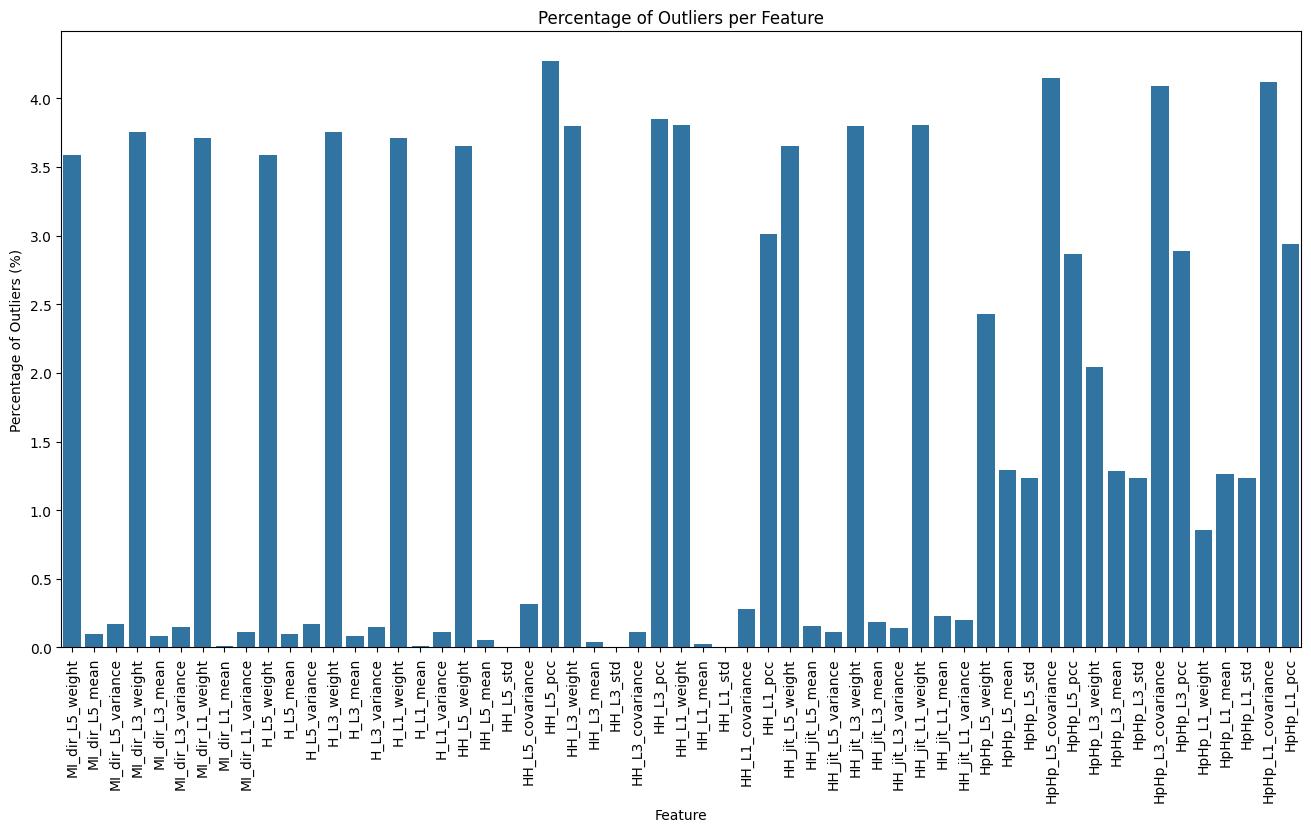

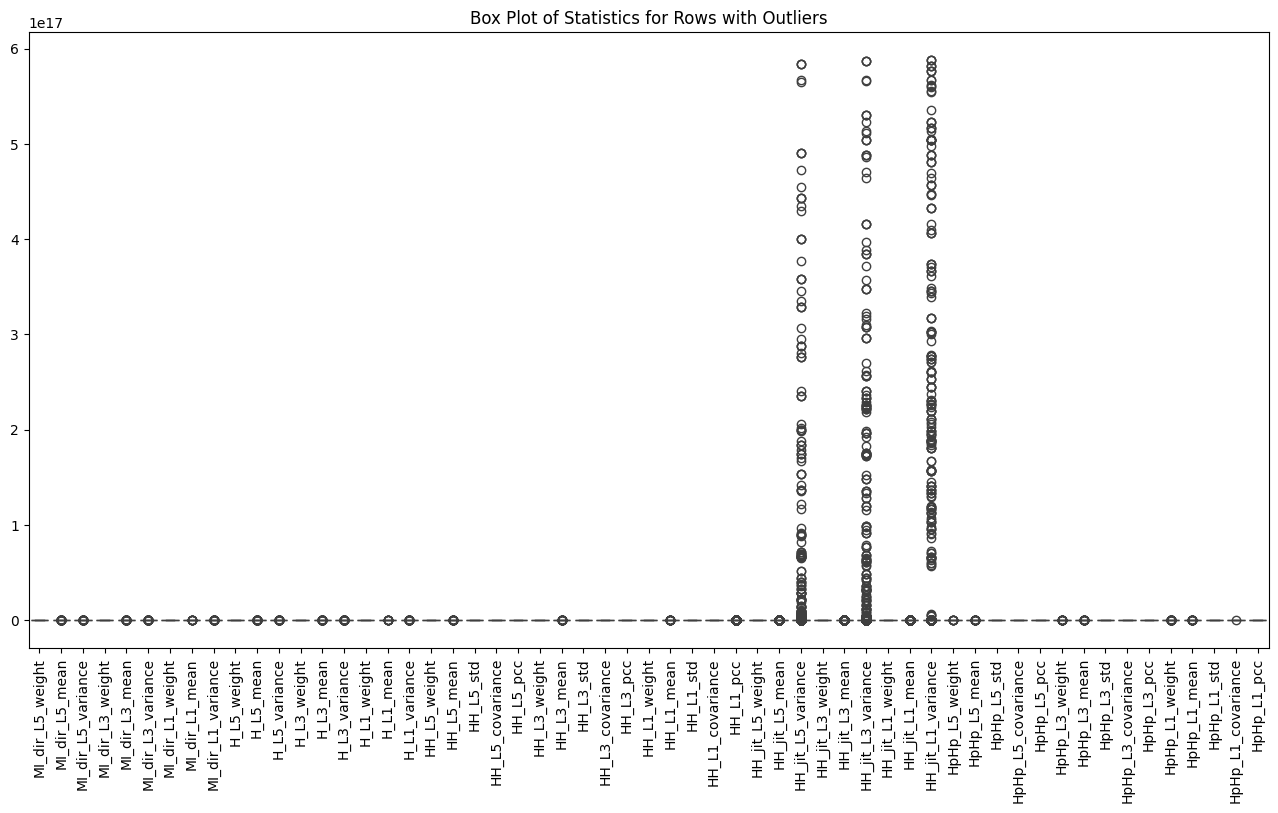

In [ ]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
z_scores_df = pd.DataFrame(z_scores, columns=df.select_dtypes(include=[np.number]).columns)

# Define threshold
threshold = 3

# Identify outliers
outliers = (z_scores_df > threshold)

# Summary of outliers
outliers_summary = df[outliers.any(axis=1)]

# Aggregate statistics for outliers
outlier_counts_per_feature = outliers.sum()
outlier_percentage_per_feature = (outlier_counts_per_feature / df.shape[0]) * 100
outliers_summary_stats = outliers_summary.describe()

# Print outlier counts and percentages
print("Number of outliers per feature:")
print(outlier_counts_per_feature)

print("\nPercentage of outliers per feature:")
print(outlier_percentage_per_feature)

print("\nAggregated statistics for rows with outliers:")
print(outliers_summary_stats)

# Visualize number of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_counts_per_feature.index, y=outlier_counts_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers per Feature')
plt.show()

# Visualize percentage of outliers per feature
plt.figure(figsize=(16, 8))
sns.barplot(x=outlier_percentage_per_feature.index, y=outlier_percentage_per_feature.values)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percentage of Outliers (%)')
plt.title('Percentage of Outliers per Feature')
plt.show()

# Visualize summary statistics for rows with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=outliers_summary)
plt.xticks(rotation=90)
plt.title('Box Plot of Statistics for Rows with Outliers')
plt.show()

In [ ]:
# Remove rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# Check the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df_cleaned.head())
print("\nSummary statistics of the cleaned dataset:")
print(df_cleaned.describe())

Original dataset shape: (98514, 57)
Cleaned dataset shape: (83995, 57)

First few rows of the cleaned dataset:
    MI_dir_L5_weight  MI_dir_L5_mean  MI_dir_L5_variance  MI_dir_L3_weight  \
23          8.781218       78.755452          775.218597          9.621333   
25          9.920890       74.974483          675.557958         11.044132   
27         10.702296       72.176148          583.386981         12.208963   
29          9.877620       69.940030          498.476552         12.185583   
31         11.407103       68.197296          425.366961         13.833924   

    MI_dir_L3_mean  MI_dir_L3_variance  MI_dir_L1_weight  MI_dir_L1_mean  \
23       78.433197          733.188416         12.181449       76.979115   
25       75.095116          650.803522         13.932813       74.541835   
27       72.622341          575.405714         15.572366       72.674193   
29       70.670979          507.273279         16.674844       71.184685   
31       69.128276          448.019051  

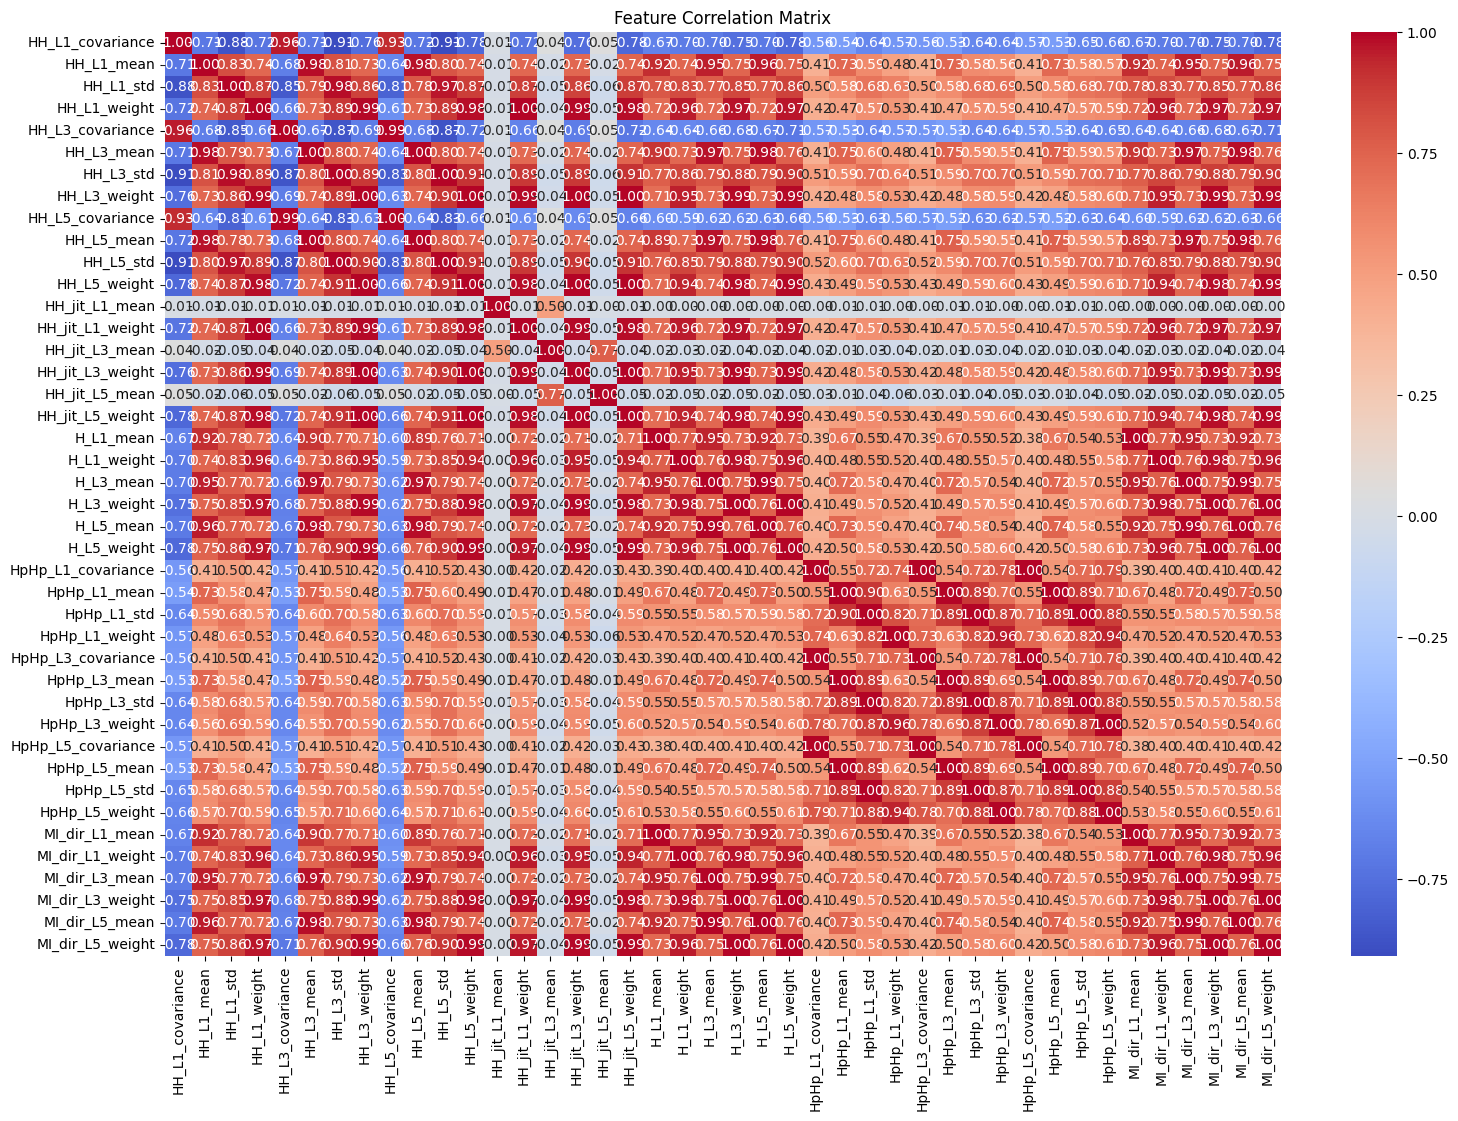

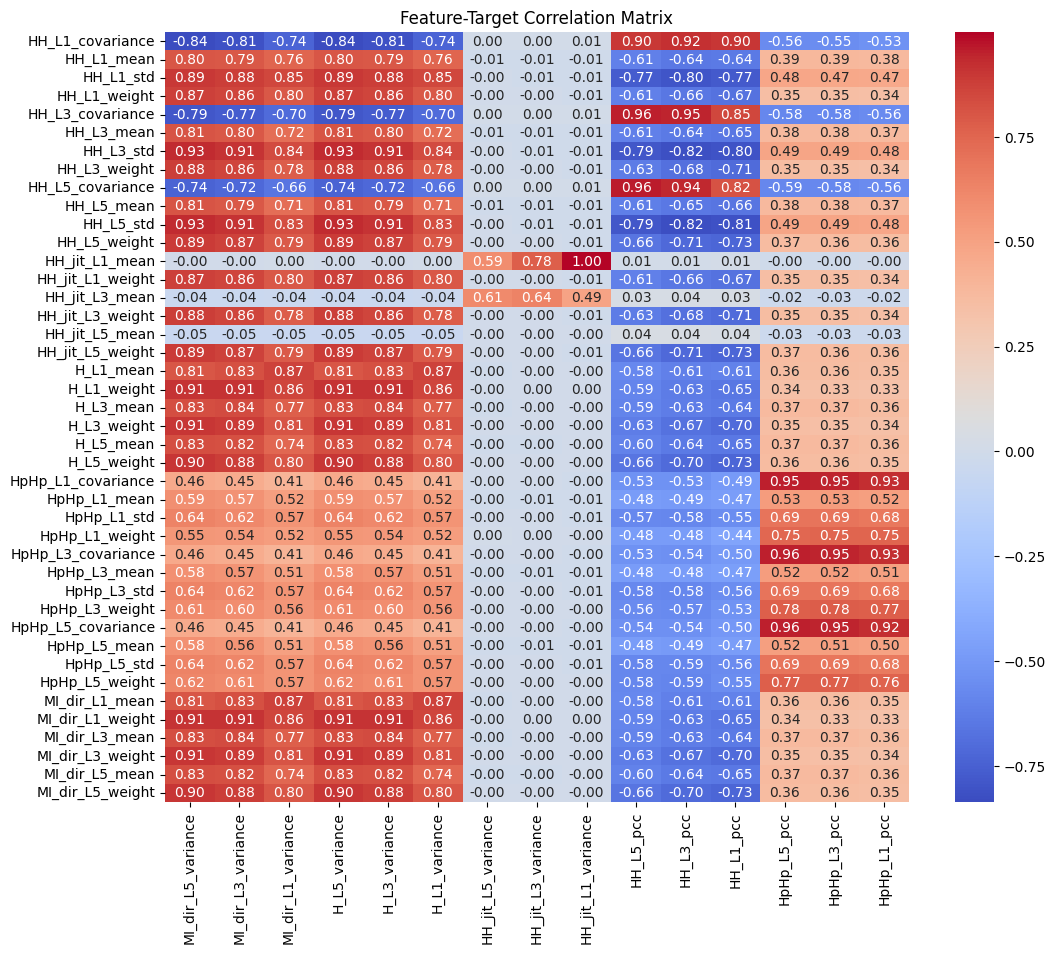

Descriptive Statistics for Features:
       HH_L1_covariance    HH_L1_mean     HH_L1_std  HH_L1_weight  \
count      8.399500e+04  83995.000000  8.399500e+04  83995.000000   
mean      -3.815248e+03     91.006404  3.773748e+01      5.358575   
std        9.340189e+03     34.470565  7.578609e+01     10.624399   
min       -3.982177e+04     60.000000  0.000000e+00      1.000000   
25%       -3.235000e-21     70.944859  6.740000e-07      1.000000   
50%        0.000000e+00     74.000173  7.010000e-06      1.085375   
75%       3.305000e-169     90.000000  8.346264e+00      2.002565   
max        2.047858e+04    197.000000  2.760966e+02     64.339569   

       HH_L3_covariance    HH_L3_mean     HH_L3_std  HH_L3_weight  \
count      8.399500e+04  83995.000000  8.399500e+04  83995.000000   
mean      -3.755102e+03     90.555796  3.517323e+01      4.532858   
std        9.385076e+03     34.619838  7.401519e+01      8.982068   
min       -3.898593e+04     60.000000  0.000000e+00      1.000000

In [ ]:
# Define target columns
target_columns = [
    'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]

# Extract feature columns (excluding target columns)
feature_columns = df_cleaned.columns.difference(target_columns)

# Extract features and targets
X = df_cleaned[feature_columns]
y = df_cleaned[target_columns]

# Compute correlation matrix for features
feature_correlation_matrix = X.corr()

# Plot the correlation matrix for features
plt.figure(figsize=(18, 12))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for features with each target variable
target_correlation_matrix = pd.DataFrame({target: X.corrwith(df_cleaned[target]) for target in target_columns})

# Plot the correlation matrix for features with each target variable
plt.figure(figsize=(12, 10))
sns.heatmap(target_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature-Target Correlation Matrix')
plt.show()

# Descriptive statistics for features
print("Descriptive Statistics for Features:")
print(X.describe())

# Descriptive statistics for target variables
print("\nDescriptive Statistics for Target Variables:")
print(y.describe())


In [ ]:
# Define features
target_columns = [
                     'MI_dir_L5_variance', 'MI_dir_L3_variance', 'MI_dir_L1_variance', 'H_L5_variance', 'H_L3_variance', 'H_L1_variance',
    'HH_jit_L5_variance', 'HH_jit_L3_variance', 'HH_jit_L1_variance', 'HH_L5_pcc',
    'HH_L3_pcc', 'HH_L1_pcc', 'HpHp_L5_pcc', 'HpHp_L3_pcc', 'HpHp_L1_pcc'
]
feature_columns = df.columns.difference(target_columns)

X = df_cleaned[feature_columns]

# Compute the correlation matrix for features
correlation_matrix = X.corr()
# Define the threshold for highly correlated features
high_corr_threshold = 3
# Extract pairs of highly correlated features
def get_highly_correlated_features(corr_matrix, threshold):
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return corr_pairs

high_corr_pairs = get_highly_correlated_features(correlation_matrix, high_corr_threshold)

# Print the highly correlated pairs
print("Highly Correlated Features (Correlation > 3):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Highly Correlated Features (Correlation > 3):


Distance Matrix:
                    HH_L1_covariance  HH_L1_mean  HH_L1_std  HH_L1_weight  \
HH_L1_covariance            0.000000    1.711377   1.876568      1.723824   
HH_L1_mean                  1.711377    0.000000   0.171972      0.264699   
HH_L1_std                   1.876568    0.171972   0.000000      0.131516   
HH_L1_weight                1.723824    0.264699   0.131516      0.000000   
HH_L3_covariance            0.040895    1.678254   1.846344      1.663727   
HH_L3_mean                  1.713969    0.018175   0.211548      0.272056   
HH_L3_std                   1.906217    0.188080   0.019818      0.110672   
HH_L3_weight                1.758426    0.267937   0.138642      0.010665   
HH_L5_covariance            0.070639    1.643668   1.809448      1.608417   
HH_L5_mean                  1.716087    0.024071   0.216025      0.274717   
HH_L5_std                   1.908816    0.198225   0.031535      0.111672   
HH_L5_weight                1.783205    0.259206   0.125688

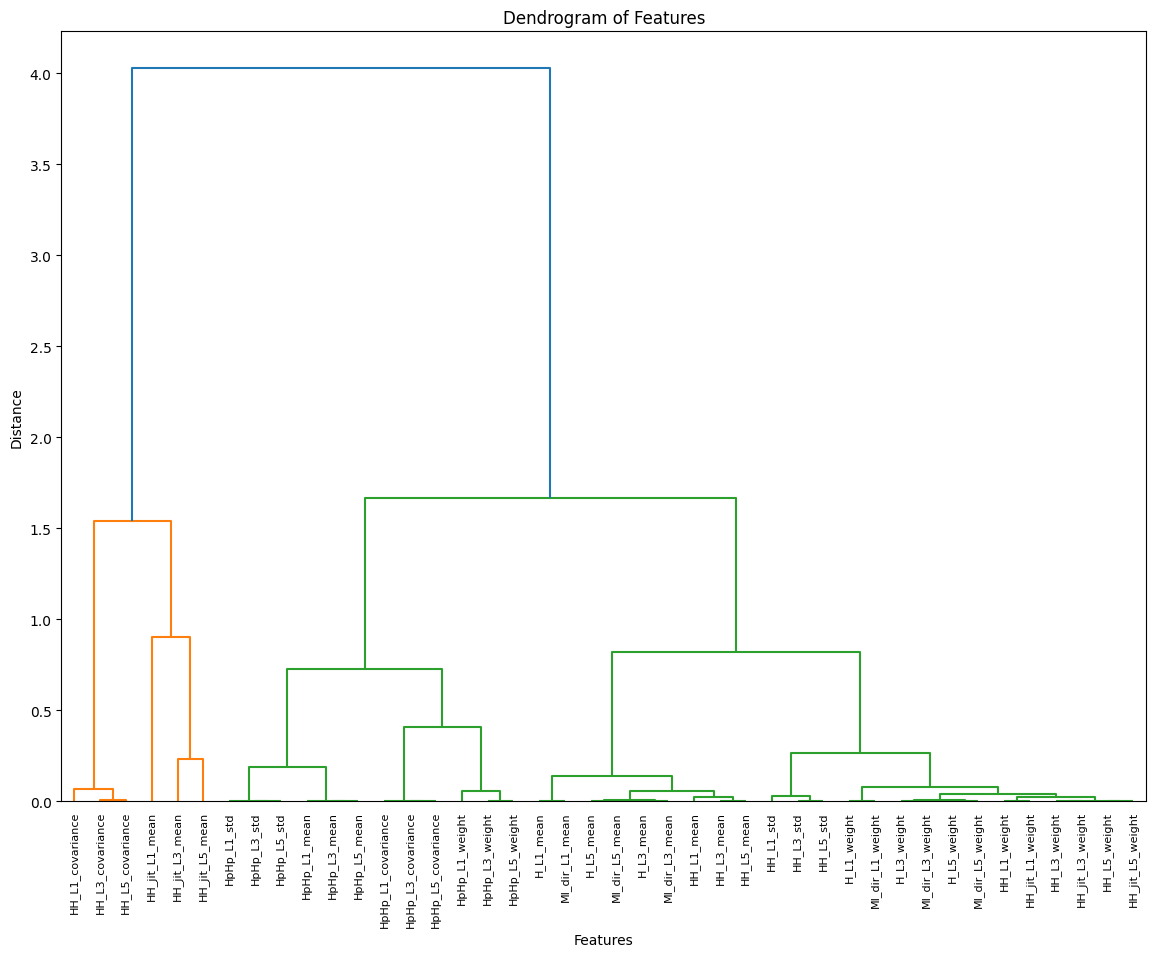

Cluster Summary:
   Cluster                                            Feature
0        1  [HH_L1_covariance, HH_L3_covariance, HH_L5_cov...
1        2                   [HH_jit_L3_mean, HH_jit_L5_mean]
2        3                                   [HH_jit_L1_mean]
3        4  [HpHp_L1_mean, HpHp_L1_std, HpHp_L3_mean, HpHp...
4        5  [HpHp_L1_covariance, HpHp_L1_weight, HpHp_L3_c...
5        6  [HH_L1_mean, HH_L3_mean, HH_L5_mean, H_L1_mean...
6        7  [HH_L1_std, HH_L1_weight, HH_L3_std, HH_L3_wei...


In [ ]:
# Assuming X is your DataFrame of feature columns
correlation_matrix = X.corr()

# Convert correlation matrix to distance matrix
distance_matrix = 1 - correlation_matrix

# Make sure the distance matrix is in condensed form
condensed_distance_matrix = squareform(distance_matrix)

# Create linkage matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')

print("Distance Matrix:")
print(distance_matrix)

print("Condensed Distance Matrix:")
print(condensed_distance_matrix)

# Plot dendrogram
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(linkage_matrix, labels=X.columns, leaf_rotation=90)
plt.title('Dendrogram of Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Generate cluster labels
max_d = 0.7  # Example threshold for distance to form clusters, you can adjust this
cluster_labels = fcluster(linkage_matrix, max_d, criterion='distance')

# Create a DataFrame to hold cluster information
feature_clusters = pd.DataFrame({
    'Feature': X.columns,
    'Cluster': cluster_labels
})

# Summarize clusters
cluster_summary = feature_clusters.groupby('Cluster')['Feature'].apply(list).reset_index()
print("Cluster Summary:")
print(cluster_summary)

               Feature  Cluster
0     HH_L1_covariance        1
1           HH_L1_mean        2
2            HH_L1_std        2
3         HH_L1_weight        2
4     HH_L3_covariance        1
5           HH_L3_mean        2
6            HH_L3_std        2
7         HH_L3_weight        2
8     HH_L5_covariance        1
9           HH_L5_mean        2
10           HH_L5_std        2
11        HH_L5_weight        2
12      HH_jit_L1_mean        1
13    HH_jit_L1_weight        2
14      HH_jit_L3_mean        1
15    HH_jit_L3_weight        2
16      HH_jit_L5_mean        1
17    HH_jit_L5_weight        2
18           H_L1_mean        2
19         H_L1_weight        2
20           H_L3_mean        2
21         H_L3_weight        2
22           H_L5_mean        2
23         H_L5_weight        2
24  HpHp_L1_covariance        2
25        HpHp_L1_mean        2
26         HpHp_L1_std        2
27      HpHp_L1_weight        2
28  HpHp_L3_covariance        2
29        HpHp_L3_mean        2
30      

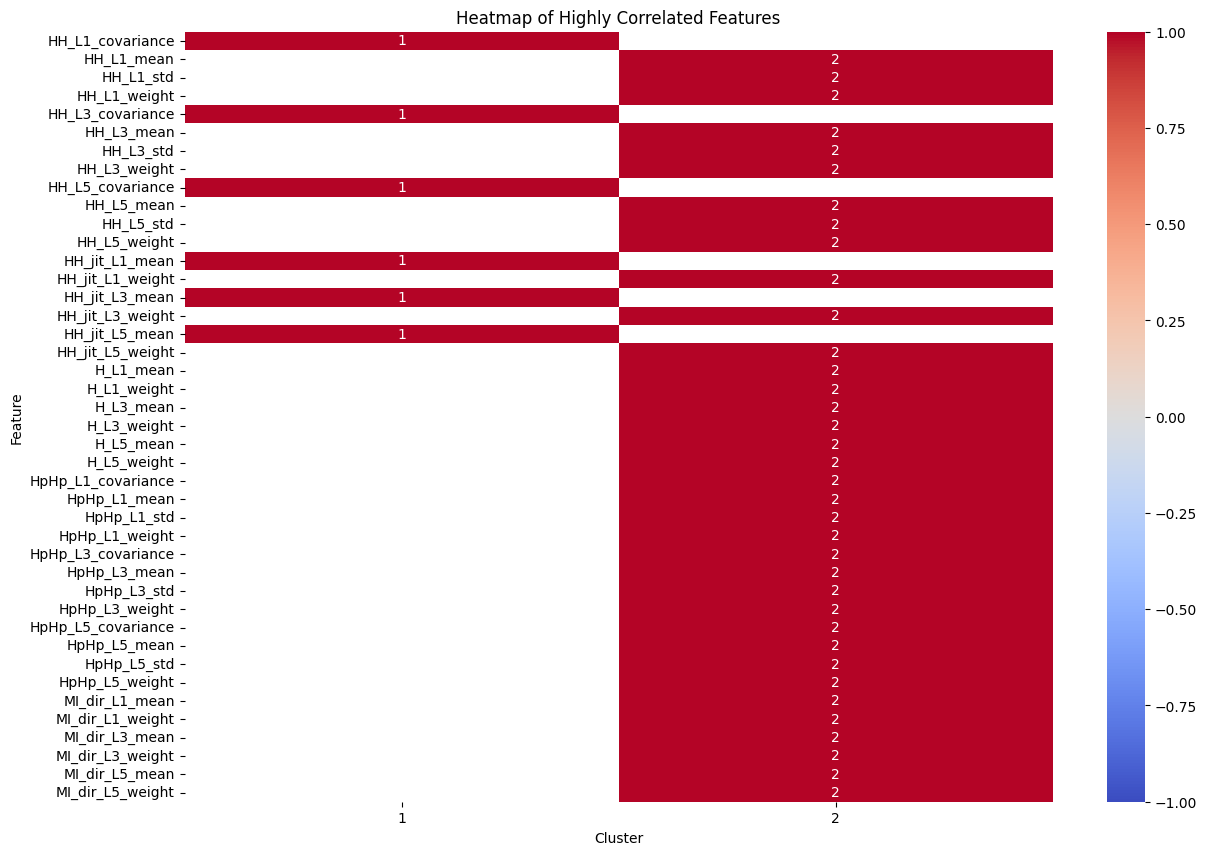

In [ ]:
# Define the maximum distance for clusters
max_distance = 2

# Get cluster labels
cluster_labels = fcluster(linkage_matrix, max_distance, criterion='distance')

# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})
print(feature_clusters)

# Create a pivot table for the heatmap
cluster_pivot = feature_clusters.pivot(index='Feature', columns='Cluster', values='Cluster')

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Highly Correlated Features')
plt.show()

In [ ]:
# Create a DataFrame with features and their cluster labels
feature_clusters = pd.DataFrame({'Feature': correlation_matrix.columns, 'Cluster': cluster_labels})

# Select one feature per cluster
selected_features = feature_clusters.groupby('Cluster')['Feature'].first().values

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.90922619 0.91190476 0.91139994 0.90693521 0.90862189]
Mean Cross-Validation Accuracy: 0.9096175983539562
Validation Set Performance:
Accuracy: 0.9046967081373891
Precision: 0.6404509399947477
Recall: 0.7005767492864914
F1-Score: 0.6452068487116424
Test Set Performance:
Accuracy: 0.9190428001666766
Precision: 0.7144081177789329
Recall: 0.7527930544892864
F1-Score: 0.7299216148074695

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.91646825 0.91636905 0.91824586 0.91368191 0.91566624]
Mean Cross-Validation Accuracy: 0.9160862617858598
Validation Set Performance:
Accuracy: 0.9111851895946187
Precision: 0.6767083614120031
Recall: 0.721183716299073
F1-Score: 0.690656656825548
Test Set Performance:
Accuracy: 0.9197571284005001
Precision: 0.731457629917199
Recall: 0.7474636717290641
F1-Score: 0.7389850205548799

-------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, 

Cross-Validation Accuracy Scores: [0.18194444        nan 0.18126798 0.18682409 0.18106955]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.19513066253943687
Precision: 0.33335798451905535
Recall: 0.3983647873628227
F1-Score: 0.10887995861736184
Test Set Performance:
Accuracy: 0.19126138460622655
Precision: 0.5000367998822404
Recall: 0.5956066198356947
F1-Score: 0.1605933344778891

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call las

Cross-Validation Accuracy Scores: [0.18194444        nan 0.18126798 0.18682409 0.18106955]
Mean Cross-Validation Accuracy: nan
Validation Set Performance:
Accuracy: 0.19513066253943687
Precision: 0.33335798451905535
Recall: 0.3983647873628227
F1-Score: 0.10887995861736184
Test Set Performance:
Accuracy: 0.19126138460622655
Precision: 0.5000367998822404
Recall: 0.5956066198356947
F1-Score: 0.1605933344778891

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.17996032 0.18025794 0.18007739 0.18523663 0.18027582]
Mean Cross-Validation Accuracy: 0.18116161884603693
Validation Set Performance:
Accuracy: 0.18143937139115424
Precision: 0.33340661756623063
Recall: 0.3937914334484538
F1-Score: 0.1024986867870391
Test Set Performance:
Accuracy: 0.1786415858086791
Precision: 0.33351413900339916
Recall: 0.3928025566208142
F1-Score: 0.10129290922992679

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.93839286 0.94047619 0.94086715 0.93491418 0.94047028]
Mean Cross-Validation Accuracy: 0.9390241319764338
Validation Set Performance:
Accuracy: 0.9706530150604202
Precision: 0.7229838635124767
Recall: 0.9137243524709847
F1-Score: 0.77061865098058
Test Set Performance:
Accuracy: 0.9673790106553961
Precision: 0.7100865912548269
Recall: 0.9050701581621124
F1-Score: 0.7605443329732194

--------------------------------------------------

Training m

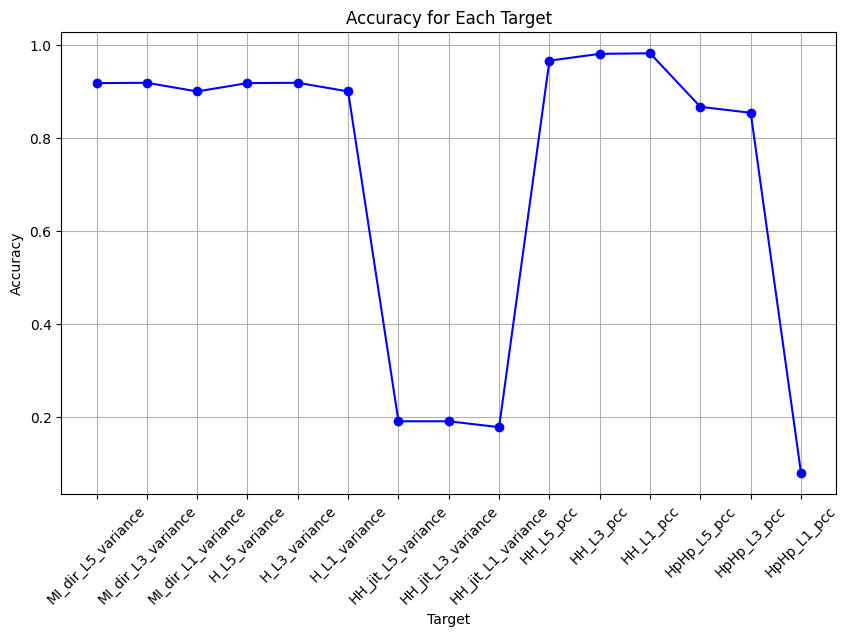

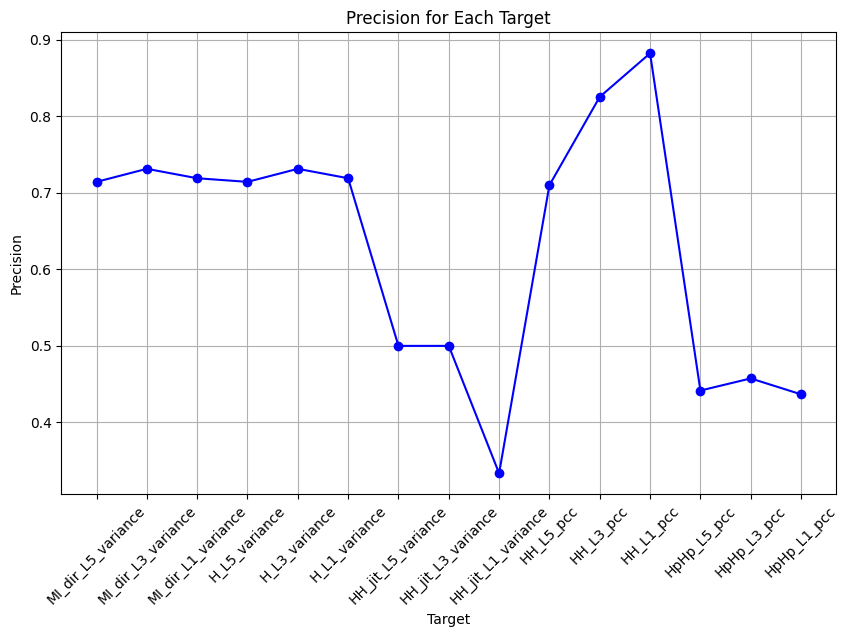

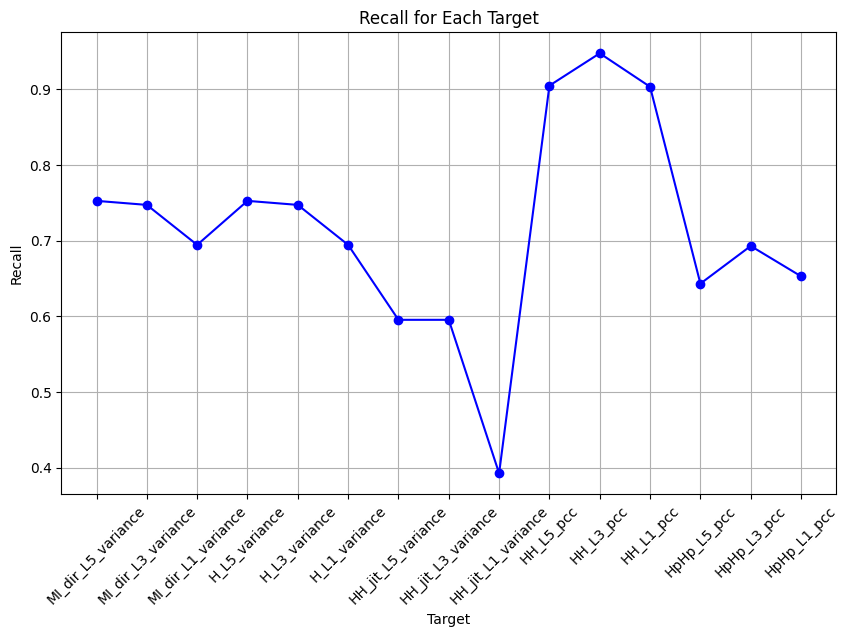

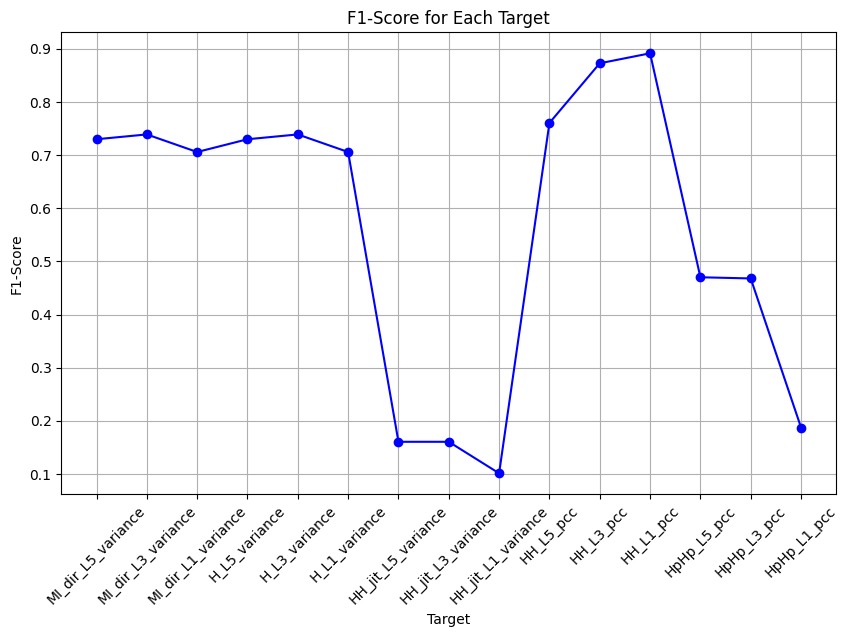

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the SVM model for classification
    model = SVC(kernel='rbf', class_weight='balanced')

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Validation Set Performance:
Accuracy: 0.4136555747365915
Precision: 0.6076009053008714
Recall: 0.3118906741788234
F1-Score: 0.31953944432198944
Test Set Performance:
Accuracy: 0.3943091850705399
Precision: 0.5567976039702626
Recall: 0.30641885975513744
F1-Score: 0.29968642305918675

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Validation Set Performance:
Accuracy: 0.5997976070004167
Precision: 0.4461206015927798
Recall: 0.3712902040342582
F1-Score: 0.36410983761784027
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined 

Accuracy: 0.590808976724805
Precision: 0.45444669969636775
Recall: 0.3666902334000455
F1-Score: 0.3553297865851242

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Validation Set Performance:
Accuracy: 0.6440264301446514
Precision: 0.60396075060505
Recall: 0.3594103799414107
F1-Score: 0.3437986637531278
Test Set Performance:
Accuracy: 0.6523007321864397
Precision: 0.49218490667806625
Recall: 0.36014592948256074
F1-Score: 0.3535753301931953

--------------------------------------------------

Training model for target: H_L5_variance
Validation Set Performance:
Accuracy: 0.4136555747365915
Precision: 0.6076009053008714
Recall: 0.3118906741788234
F1-Score: 0.31953944432198944
Test Set Performance:
Accuracy: 0.3943091850705399
Precision: 0.5567976039702626
Recall: 0.30641885975513744
F1-Score: 0.29968642305918675

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined 

Validation Set Performance:
Accuracy: 0.5997976070004167
Precision: 0.4461206015927798
Recall: 0.3712902040342582
F1-Score: 0.36410983761784027
Test Set Performance:
Accuracy: 0.590808976724805
Precision: 0.45444669969636775
Recall: 0.3666902334000455
F1-Score: 0.3553297865851242

--------------------------------------------------

Training model for target: H_L1_variance
Validation Set Performance:
Accuracy: 0.6440264301446514
Precision: 0.60396075060505
Recall: 0.3594103799414107
F1-Score: 0.3437986637531278
Test Set Performance:
Accuracy: 0.6523007321864397
Precision: 0.49218490667806625
Recall: 0.36014592948256074
F1-Score: 0.3535753301931953

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-

Accuracy: 0.8677897493898447
Precision: 0.24996570644718794
Recall: 0.2169732690361374
F1-Score: 0.23230391688179242
Test Set Performance:
Accuracy: 0.8695755699744032
Precision: 0.3333105163483697
Recall: 0.289875778862563
F1-Score: 0.31007949395569984

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Validation Set Performance:
Accuracy: 0.8677897493898447
Precision: 0.24996570644718794
Recall: 0.2169732690361374
F1-Score: 0.23230391688179242
Test Set Performance:
Accuracy: 0.8695755699744032
Precision: 0.3333105163483697
Recall: 0.289875778862563
F1-Score: 0.31007949395569984

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Validation Set Performance:
Accuracy: 0.9299363057324841
Precision: 0.24992001023868946
Recall: 0.23255329284268192
F1-Score: 0.24092409240924093
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Accuracy: 0.9303529972022144
Precision: 0.24990406140070354
Recall: 0.23267135115822069
F1-Score: 0.24098001726902674

--------------------------------------------------

Training model for target: HH_L5_pcc
Validation Set Performance:
Accuracy: 0.9633906780165487
Precision: 0.5350992499935898
Recall: 0.46104755445641343
F1-Score: 0.4781113868148737
Test Set Performance:
Accuracy: 0.9588070718495149
Precision: 0.559354904186231
Recall: 0.46191565245174804
F1-Score: 0.4810074783951522

--------------------------------------------------

Training model for target: HH_L3_pcc
Validation Set Performance:
Accuracy: 0.9134472290017263
Precision: 0.606079960900646
Recall: 0.39195380518004125
F1-Score: 0.4296141531186733
Test Set Performance:
Accuracy: 0.9198761831061373
Precision: 0.5363195031232832
Recall: 0.39326059433571364
F1-Score: 0.4301222949825893

--------------------------------------------------

Training model for target: HH_L1_pcc
Validation Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined 

Accuracy: 0.909101732245967
Precision: 0.7290116769899209
Recall: 0.39268955820571894
F1-Score: 0.43517590988224714
Test Set Performance:
Accuracy: 0.9130305375319959
Precision: 0.690470555450292
Recall: 0.39511224422877916
F1-Score: 0.4380105028907364

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Validation Set Performance:
Accuracy: 0.05268170724447884
Precision: 0.13730296615810633
Recall: 0.547199404428479
F1-Score: 0.18752035806765324
Test Set Performance:
Accuracy: 0.9298767783796654
Precision: 0.4606715832565392
Recall: 0.5194422348903325
F1-Score: 0.48315074659015006

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Validation Set Performance:
Accuracy: 0.053991309006488485
Precision: 0.14247834056620032
Recall: 0.5633883590119834
F1-Score: 0.19209798759316754
Test Set Performance:
Accuracy: 0.9276147389725579
Precision: 0.4603059579947355
Recall: 0.510678959879338
F1-Score: 0.48022090115525

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning

Validation Set Performance:
Accuracy: 0.047502827549258886
Precision: 0.14561947450525933
Recall: 0.5130622090487508
F1-Score: 0.17107582131829327
Test Set Performance:
Accuracy: 0.9132091195904518
Precision: 0.455472817146807
Recall: 0.5012113968123425
F1-Score: 0.4746146702471175

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.7671170903029942
Average Precision: 0.4723985890629817
Average Recall: 0.3773702691171392
Average F1-Score: 0.3776965786077625


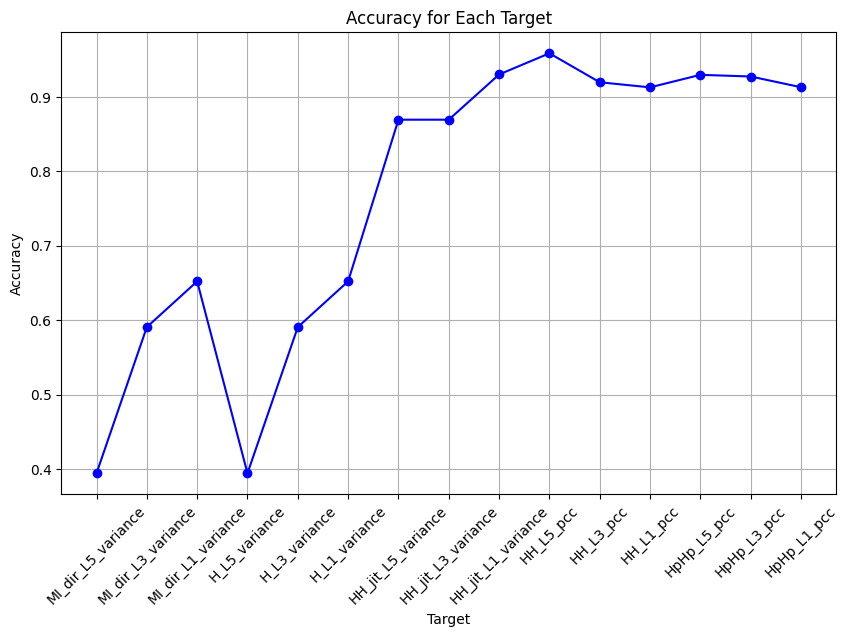

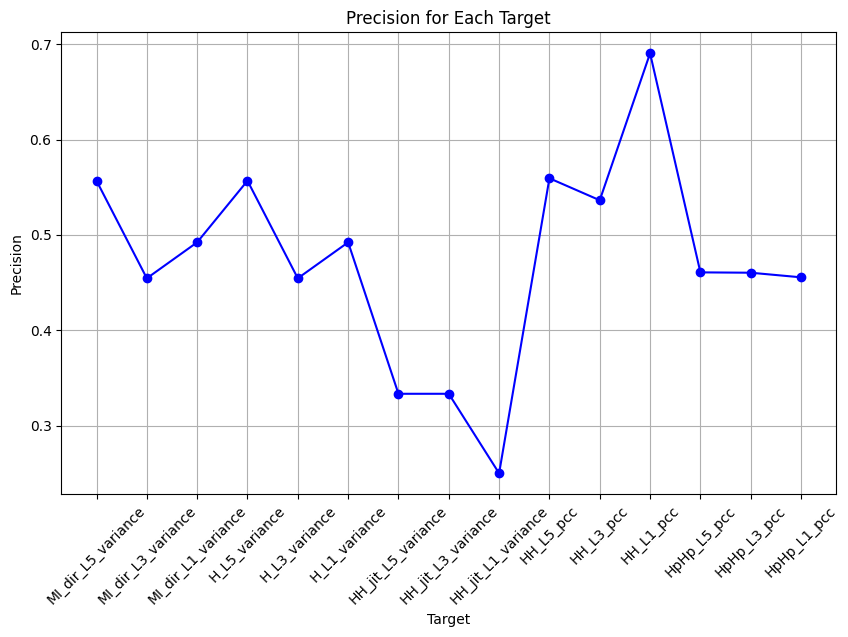

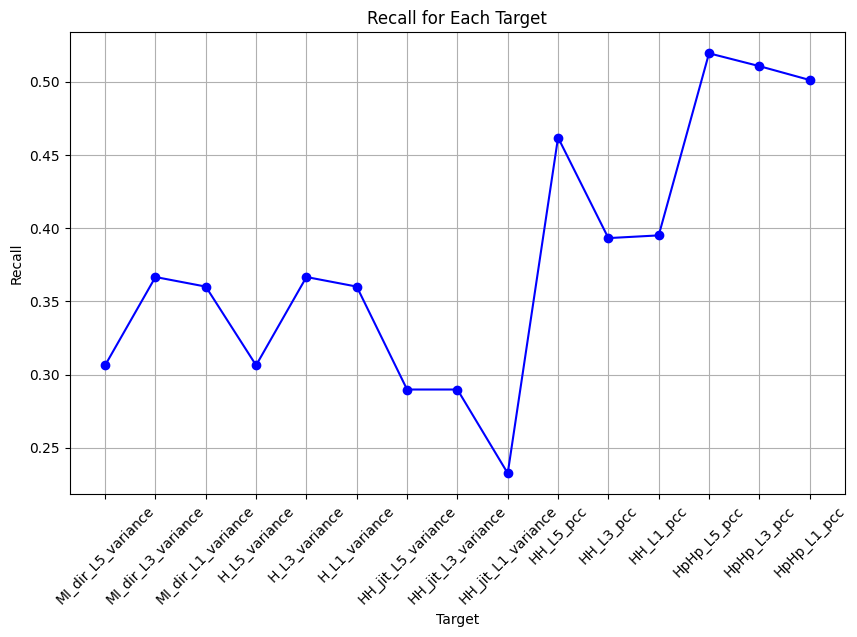

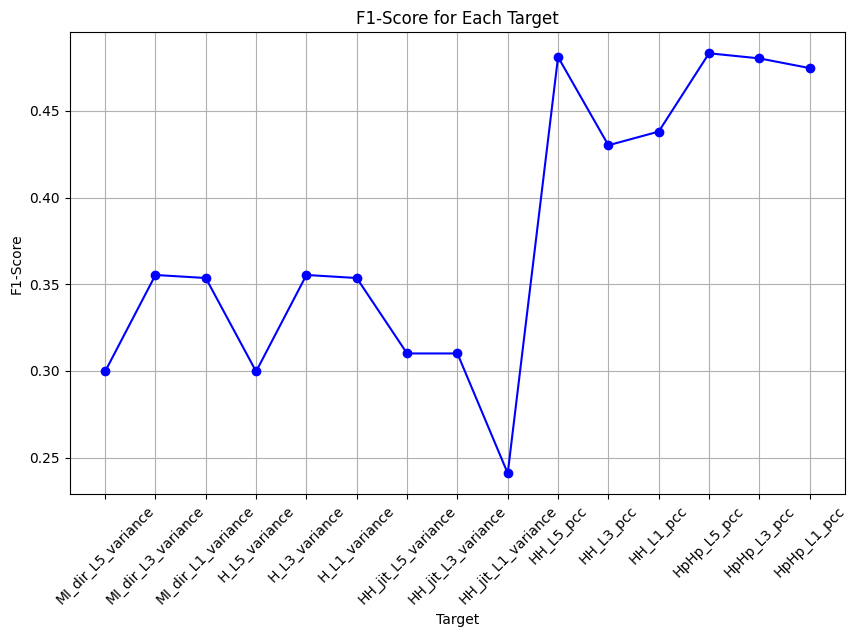

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Train the model
    model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = model.predict(X_valid)

    # Discretize the continuous predictions into bins
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.9359127  0.93789683 0.9368985  0.93798988 0.93858518]
Mean Cross-Validation Accuracy: 0.9374566165388668
Validation Set Performance:
Accuracy: 0.9253526995654503
Precision: 0.4386783124588003
Recall: 0.4279024489486932
F1-Score: 0.43314225751352076
Test Set Performance:
Accuracy: 0.9118399904756236
Precision: 0.41399606028102787
Recall: 0.4373442090611249
F1-Score: 0.42504817336630313

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.93680556 0.9343254  0.93868439 0.93650164 0.9411648 ]
Mean Cross-Validation Accuracy: 0.9374963561672314
Validation Set Performance:
Accuracy: 0.912554318709447
Precision: 0.4312949604901437
Recall: 0.4293727838864093
F1-Score: 0.4303304427940525
Test Set Performance:
Accuracy: 0.903625215786654
Precision: 0.4203198443073392
Recall: 0.4404684404932667
F1-Score: 0.4299976194350402

--------------------------------------------------

Training model for target: MI_dir_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.92906746 0.93224206 0.93064788 0.93203691 0.9338228 ]
Mean Cross-Validation Accuracy: 0.9315634227696437
Validation Set Performance:
Accuracy: 0.8816000952437645
Precision: 0.38486919166815303
Recall: 0.42937715263005793
F1-Score: 0.40515435353740015
Test Set Performance:
Accuracy: 0.8994583010893505
Precision: 0.410519872377642
Recall: 0.4433992842860317
F1-Score: 0.4260537744277988

--------------------------------------------------

Training model for target: H_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.9359127  0.93789683 0.9368985  0.93798988 0.93858518]
Mean Cross-Validation Accuracy: 0.9374566165388668
Validation Set Performance:
Accuracy: 0.9253526995654503
Precision: 0.4386783124588003
Recall: 0.4279024489486932
F1-Score: 0.43314225751352076
Test Set Performance:
Accuracy: 0.9118399904756236
Precision: 0.41399606028102787
Recall: 0.4373442090611249
F1-Score: 0.42504817336630313

--------------------------------------------------

Training model for target: H_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.93680556 0.9343254  0.93868439 0.93650164 0.9411648 ]
Mean Cross-Validation Accuracy: 0.9374963561672314
Validation Set Performance:
Accuracy: 0.912554318709447
Precision: 0.4312949604901437
Recall: 0.4293727838864093
F1-Score: 0.4303304427940525
Test Set Performance:
Accuracy: 0.903625215786654
Precision: 0.4203198443073392
Recall: 0.4404684404932667
F1-Score: 0.4299976194350402

--------------------------------------------------

Training model for target: H_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.92906746 0.93224206 0.93064788 0.93203691 0.9338228 ]
Mean Cross-Validation Accuracy: 0.9315634227696437
Validation Set Performance:
Accuracy: 0.8816000952437645
Precision: 0.38486919166815303
Recall: 0.42937715263005793
F1-Score: 0.40515435353740015
Test Set Performance:
Accuracy: 0.8994583010893505
Precision: 0.410519872377642
Recall: 0.4433992842860317
F1-Score: 0.4260537744277988

--------------------------------------------------

Training model for target: HH_jit_L5_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:
Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:
Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99970238 0.99970238 0.99980157 0.99980157 0.99970235]
Mean Cross-Validation Accuracy: 0.9997420497120368
Validation Set Performance:
Accuracy: 0.9997023632359069
Precision: 0.33323412107863565
Recall: 0.3333333333333333
F1-Score: 0.3332837198225821
Test Set Performance:
Accuracy: 0.9996428358830883
Precision: 0.3332142786276961
Recall: 0.3333333333333333
F1-Score: 0.3332737953480988

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.9719246  0.96994048 0.97231868 0.9712273  0.97003671]
Mean Cross-Validation Accuracy: 0.971089555212236
Validation Set Performance:
Accuracy: 0.9463658551104233
Precision: 0.47970788710327583
Recall: 0.42962669681610394
F1-Score: 0.45039108761848023
Test Set Performance:
Accuracy: 0.9521995356866481
Precision: 0.4801191543130486
Recall: 0.4381135320151972
F1-Score: 0.4562392279650048

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.98730159 0.98759921 0.98978073 0.98769719 0.98720111]
Mean Cross-Validation Accuracy: 0.9879159658538814
Validation Set Performance:
Accuracy: 0.9763676409310078
Precision: 0.4830830412551399
Recall: 0.49159080113802045
F1-Score: 0.4872416330796374
Test Set Performance:
Accuracy: 0.9813084112149533
Precision: 0.49013239674726183
Recall: 0.4919820337815516
F1-Score: 0.491053412850212

--------------------------------------------------

Training model for target: HH_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.99107143 0.99255952 0.992658   0.99156662 0.99166584]
Mean Cross-Validation Accuracy: 0.9919042835409787
Validation Set Performance:
Accuracy: 0.9776177153401988
Precision: 0.4968761805199977
Recall: 0.49413848788341574
F1-Score: 0.49549659709661387
Test Set Performance:
Accuracy: 0.9736293827013512
Precision: 0.4965355308497868
Recall: 0.48633777909179504
F1-Score: 0.4912756907031628

--------------------------------------------------

Training model for target: HpHp_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.95079365 0.95367063 0.95078877 0.95346761 0.95237623]
Mean Cross-Validation Accuracy: 0.9522193776310008
Validation Set Performance:
Accuracy: 0.01875111613786535
Precision: 0.004902876354127755
Recall: 0.19836272040302266
F1-Score: 0.009569232638677929
Test Set Performance:
Accuracy: 0.9288648133817489
Precision: 0.24267496111975118
Recall: 0.24565491183879093
F1-Score: 0.24415584415584415

--------------------------------------------------

Training model for target: HpHp_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.95       0.9530754  0.95068955 0.95307074 0.95197936]
Mean Cross-Validation Accuracy: 0.9517630107074744
Validation Set Performance:
Accuracy: 0.015655693791297103
Precision: 0.004103732367994008
Recall: 0.17486702127659576
F1-Score: 0.008019270642761313
Test Set Performance:
Accuracy: 0.9259479730936365
Precision: 0.28424308588064046
Recall: 0.2812468992143173
F1-Score: 0.28250710283848013

--------------------------------------------------

Training model for target: HpHp_L1_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

Cross-Validation Accuracy Scores: [0.95019841 0.95188492 0.94989582 0.95148328 0.95068955]
Mean Cross-Validation Accuracy: 0.9508303981876509
Validation Set Performance:
Accuracy: 0.020477409369605334
Precision: 0.2531905483952489
Recall: 0.23287597840018834
F1-Score: 0.01081745680549624
Test Set Performance:
Accuracy: 0.922435859277338
Precision: 0.4857450587090669
Recall: 0.47004054129794426
F1-Score: 0.4775003427507729

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.9409171180824255
Average Precision: 0.42015176618843003
Average Recall: 0.42594219321691845
Average F1-Score: 0.4225449857671698


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall

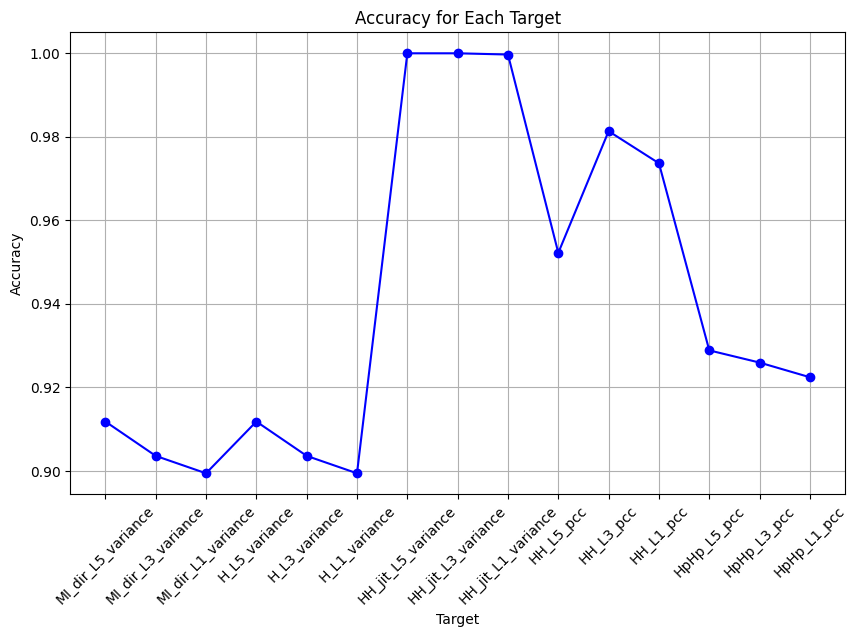

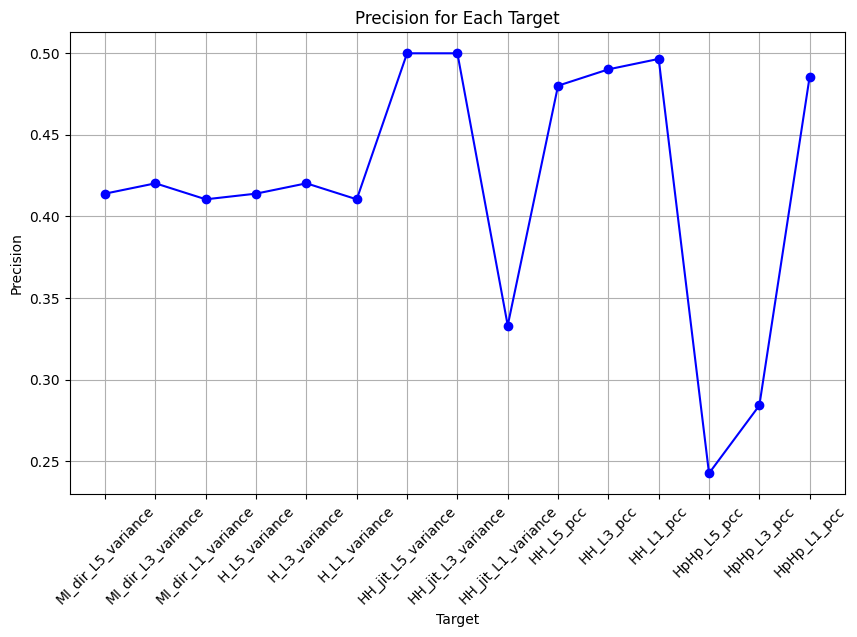

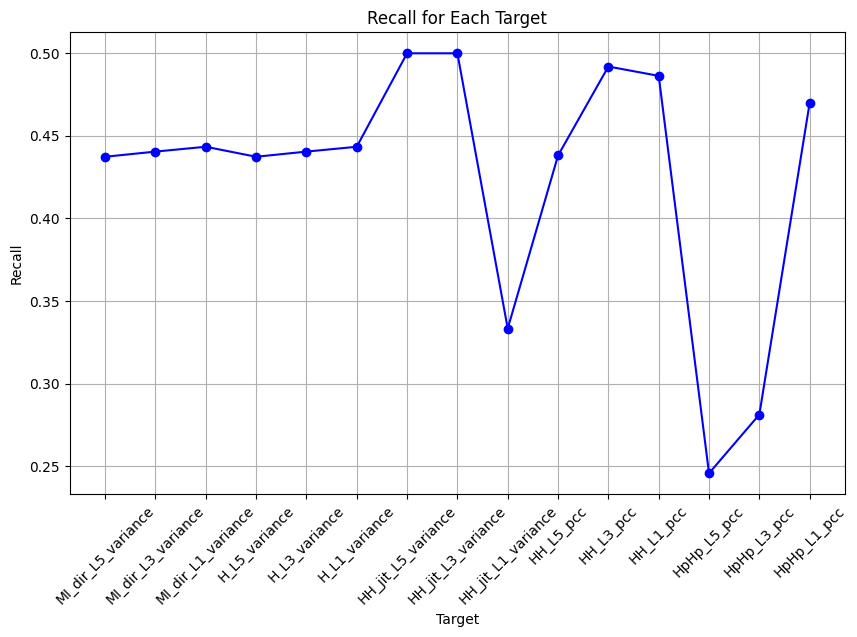

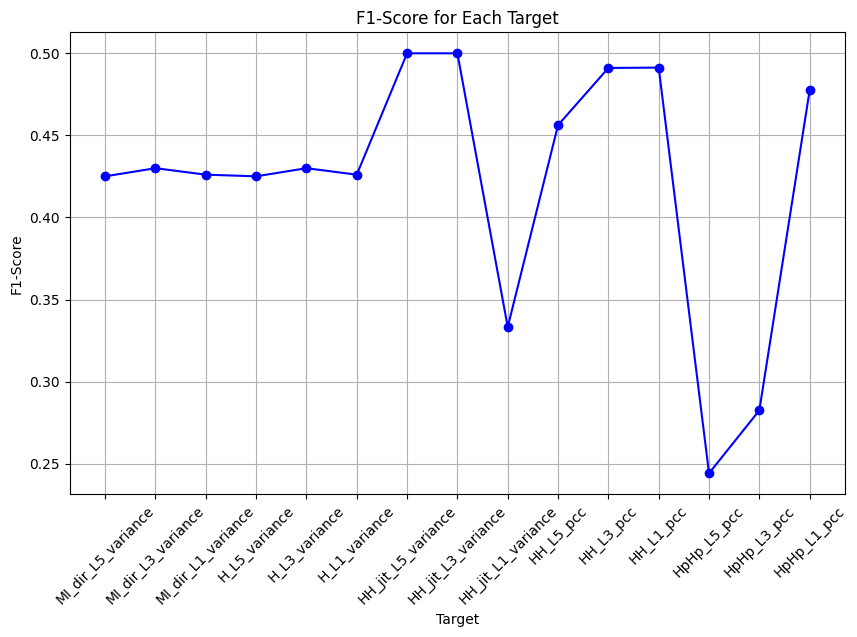

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(knn_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    knn_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = knn_model.predict(X_valid)
    y_valid_pred_binned = np.digitize(y_valid_pred, bins=np.linspace(y_valid_binned[target].min(), y_valid_binned[target].max(), 4)) - 1

    # Predict on the test set
    y_test_pred = knn_model.predict(X_test)
    y_test_pred_binned = np.digitize(y_test_pred, bins=np.linspace(y_test_binned[target].min(), y_test_binned[target].max(), 4)) - 1

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.91448413 0.91845238 0.9154678  0.91695605 0.91477329]
Mean Cross-Validation Accuracy: 0.9160267301020351
Validation Set Performance:
Accuracy: 0.9093398416572415
Precision: 0.6572221382018064
Recall: 0.7615744438436501
F1-Score: 0.6946787742010301
Test Set Performance:
Accuracy: 0.9286862313232931
Precision: 0.7769625730979012
Recall: 0.826347051099277
F1-Score: 0.7966839379041528

--------------------------------------------------

Training model for target: MI_dir_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.91825397 0.91934524 0.91894037 0.91844429 0.91616232]
Mean Cross-Validation Accuracy: 0.9182292370432314
Validation Set Performance:
Accuracy: 0.9204714566343235
Precision: 0.7284627817226704
Recall: 0.7926215716601938
F1-Score: 0.7557061612943897
Test Set Performance:
Accuracy: 0.9142210845883684
Precision: 0.7319441953648775
Recall: 0.7487464871560047
F1-Score: 0.7263310040938546

--------------------------------------------------

Training model for target: MI_dir_L1_variance
Cross-Validation Accuracy Scores: [0.89632937 0.89761905 0.89810497 0.89899792 0.90088302]
Mean Cross-Validation Accuracy: 0.8983868647998274
Validation Set Performance:
Accuracy: 0.869456515268766
Precision: 0.48960536826653583
Recall: 0.6012517181062788
F1-Score: 0.5285652781431069
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.8785642002500149
Precision: 0.5079990853968405
Recall: 0.602922271066079
F1-Score: 0.5417509538579062

--------------------------------------------------

Training model for target: H_L5_variance
Cross-Validation Accuracy Scores: [0.91448413 0.91845238 0.9154678  0.91695605 0.91477329]
Mean Cross-Validation Accuracy: 0.9160267301020351
Validation Set Performance:
Accuracy: 0.9093398416572415
Precision: 0.6572221382018064
Recall: 0.7615744438436501
F1-Score: 0.6946787742010301
Test Set Performance:
Accuracy: 0.9286862313232931
Precision: 0.7769625730979012
Recall: 0.826347051099277
F1-Score: 0.7966839379041528

--------------------------------------------------

Training model for target: H_L3_variance
Cross-Validation Accuracy Scores: [0.91825397 0.91934524 0.91894037 0.91844429 0.91616232]
Mean Cross-Validation Accuracy: 0.9182292370432314
Validation Set Performance:
Accuracy: 0.9204714566343235
Precision: 0.7284627817226704
Recall: 0.7926215716601938
F1-Score: 0.755706161

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.8785642002500149
Precision: 0.5079990853968405
Recall: 0.602922271066079
F1-Score: 0.5417509538579062

--------------------------------------------------

Training model for target: HH_jit_L5_variance
Cross-Validation Accuracy Scores: [0.7797619  0.99990079 0.78420478 0.78033535 0.79075305]
Mean Cross-Validation Accuracy: 0.8269911764520606
Validation Set Performance:
Accuracy: 0.7815941425084827
Precision: 0.3332825667580465
Recall: 0.26056240201623304
F1-Score: 0.2924699566752425
Test Set Performance:
Accuracy: 0.7812965057443896
Precision: 0.5001360544217687
Recall: 0.8906417430646505
F1-Score: 0.43887907980408114

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

Cross-Validation Accuracy Scores: [0.7797619  0.99990079 0.78420478 0.78033535 0.79075305]
Mean Cross-Validation Accuracy: 0.8269911764520606
Validation Set Performance:
Accuracy: 0.7815941425084827
Precision: 0.3332825667580465
Recall: 0.26056240201623304
F1-Score: 0.2924699566752425
Test Set Performance:
Accuracy: 0.7812965057443896
Precision: 0.5001360544217687
Recall: 0.8906417430646505
F1-Score: 0.43887907980408114

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.26269841 0.25238095 0.24238516 0.23990475 0.25280286]
Mean Cross-Validation Accuracy: 0.2500344264437925
Validation Set Performance:
Accuracy: 0.24430025596761712
Precision: 0.3330898466033601
Recall: 0.08145766345123258
F1-Score: 0.13090282761590355
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: Fut

Accuracy: 0.24531222096553365
Precision: 0.33340742665025175
Recall: 0.3483872248357451
F1-Score: 0.1315645798899819

--------------------------------------------------

Training model for target: HH_L5_pcc
Cross-Validation Accuracy Scores: [0.94136905 0.94355159 0.94245461 0.93908126 0.94404207]
Mean Cross-Validation Accuracy: 0.942099713847903
Validation Set Performance:
Accuracy: 0.9800583368057623
Precision: 0.809117638470029
Recall: 0.6545492359460802
F1-Score: 0.6529255779044018
Test Set Performance:
Accuracy: 0.9755342579915471
Precision: 0.7980175524541636
Recall: 0.652471254280765
F1-Score: 0.6464444412091639

--------------------------------------------------

Training model for target: HH_L3_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Cross-Validation Accuracy Scores: [0.97321429 0.97301587 0.97420379 0.97271555 0.97390614]
Mean Cross-Validation Accuracy: 0.9734111274896572
Validation Set Performance:
Accuracy: 0.9686886124174058
Precision: 0.7779941564537155
Recall: 0.6687696347521678
F1-Score: 0.6616182235216851
Test Set Performance:
Accuracy: 0.9756533126971844
Precision: 0.6566276462838158
Recall: 0.6608512537428871
F1-Score: 0.6499233301960529

--------------------------------------------------

Training model for target: HH_L1_pcc
Cross-Validation Accuracy Scores: [0.95714286 0.95873016 0.96170255 0.95852763 0.95902371]
Mean Cross-Validation Accuracy: 0.9590253820217111
Validation Set Performance:
Accuracy: 0.9616643847848086
Precision: 0.7889937846942505
Recall: 0.6644477860622836
F1-Score: 0.6603419577020955
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Accuracy: 0.9671409012441217
Precision: 0.8167284764365409
Recall: 0.66527431073726
F1-Score: 0.667571942480225

--------------------------------------------------

Training model for target: HpHp_L5_pcc
Cross-Validation Accuracy Scores: [0.90823413 0.90724206 0.90376029 0.90405794 0.90901875]
Mean Cross-Validation Accuracy: 0.9064626356545198
Validation Set Performance:
Accuracy: 0.8886838502291803
Precision: 0.421546685907185
Recall: 0.609352859414318
F1-Score: 0.4583504114928039
Test Set Performance:
Accuracy: 0.04631228049288648
Precision: 0.11460957096702375
Recall: 0.5678780284043442
F1-Score: 0.1631439613291342

--------------------------------------------------

Training model for target: HpHp_L3_pcc
Cross-Validation Accuracy Scores: [0.90565476 0.90386905 0.90088302 0.90068459 0.90614148]
Mean Cross-Validation Accuracy: 0.9034465815297248
Validation Set Performance:
Accuracy: 0.8895767605214596
Precision: 0.4248713899974404
Recall: 0.6093877688496815
F1-Score: 0.46218663354750

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

Accuracy: 0.058574915173522236
Precision: 0.11959675745492593
Recall: 0.5906052070326239
F1-Score: 0.16842691748764305

--------------------------------------------------

Overall Performance on Test Set:
Average Accuracy: 0.6880449233089273
Average Precision: 0.5325290095699088
Average Recall: 0.6754953900348117
Average F1-Score: 0.5063947596319301


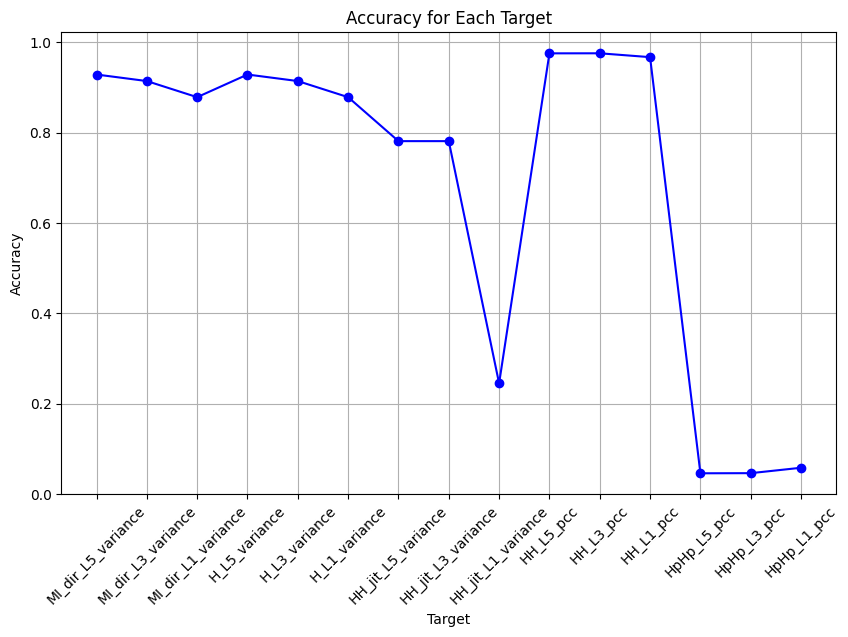

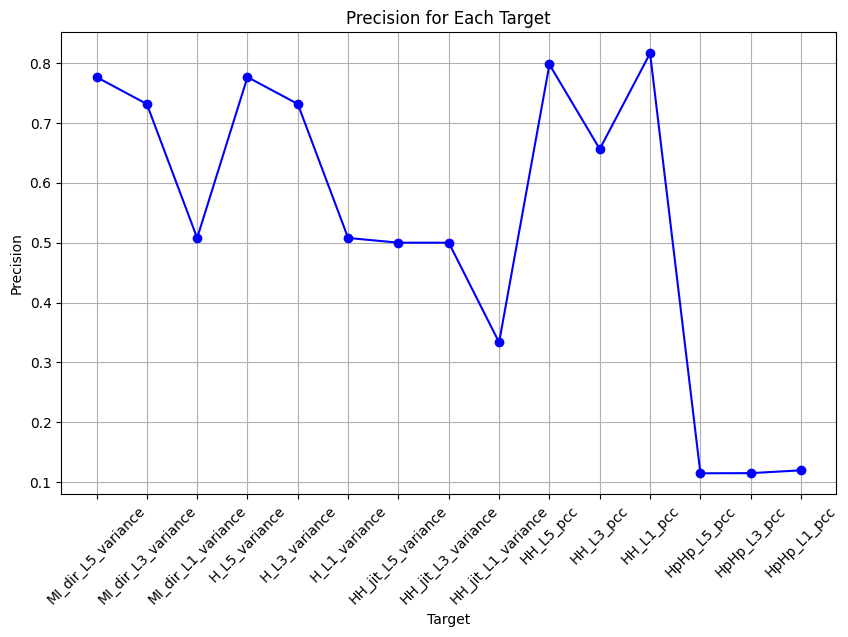

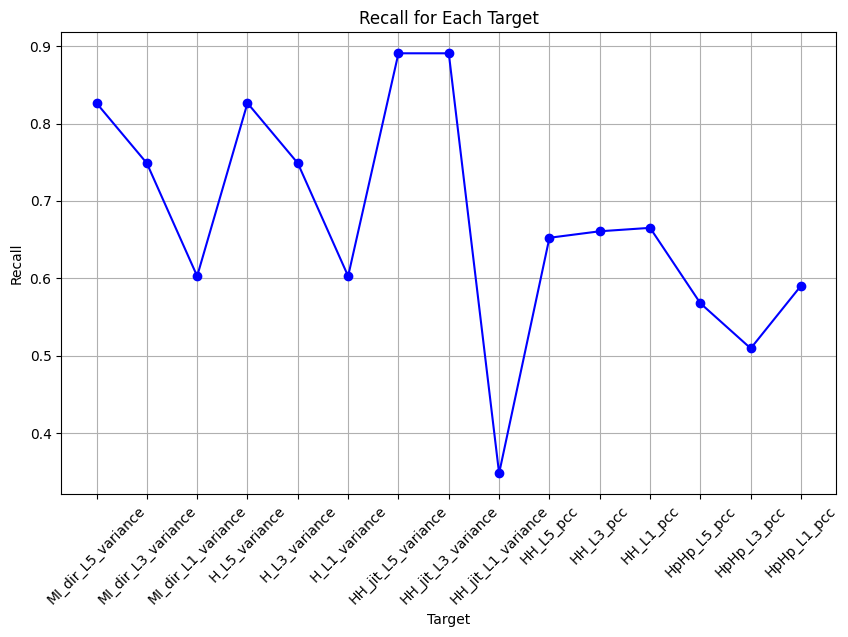

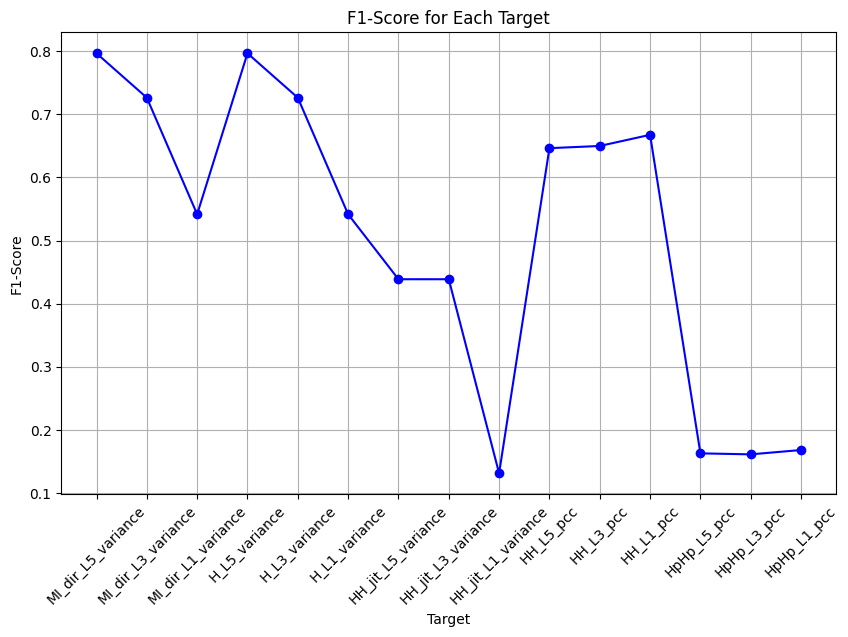

In [ ]:
# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize the Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Perform cross-validation
    cv_scores = cross_val_score(nb_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model
    nb_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = nb_model.predict(X_valid)
    y_valid_pred_binned = bin_targets(pd.DataFrame(y_valid_pred, columns=[target]))

    # Predict on the test set
    y_test_pred = nb_model.predict(X_test)
    y_test_pred_binned = bin_targets(pd.DataFrame(y_test_pred, columns=[target]))

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred_binned[target])
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred_binned[target])
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.96666667 0.9702381  0.9681516  0.96745709 0.96825082]
Mean Cross-Validation Accuracy: 0.9681528543553546
Validation Set Performance:
Accuracy: 0.9601762009643431
Precision: 0.8047780645295545
Recall: 0.863615893926213
F1-Score: 0.822983898392311
Test Set Performance:
Accuracy: 0.9571403059705935
Precision: 0.8630053363635755
Recall: 0.8173292208298748
F1-Score: 0.8374710134413584

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.96855159 0.97003968 0.96844925 0.96924298 0.96993749]
Mean Cross-Validation Accuracy: 0.9692441990024836
Validation Set Performance:
Accuracy: 0.9659503541877492
Precision: 0.8713503465880108
Recall: 0.8861205023394582
F1-Score: 0.8779555216614249
Test Set Performance:
Accuracy: 0.9574379427346866
Precision: 0.8934619252282915
Recall: 0.8333423090187259
F1-Score: 0.8593259538321076

------------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:
Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L3_variance
Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L1_variance
Cross-Validation Accuracy Scores: [0.99970238 0.99960317 0.99990078 0.99980157 0.99980157]
Mean Cross-Validation Accuracy: 0.9997618949190287
Validation Set Performance:
Accuracy: 0.9997023632359069
Precision: 0.33323412107863565
Recall: 0.3333333333333333
F1-Score: 0.3332837198225821
Test Set Performance:
Accuracy: 0.9996428358830883
Precision: 0.3332142786276961
Recall: 0.3333333333333333
F1-Score: 0.3332737953480988

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97400794 0.975      0.97638655 0.97579125 0.97291398]
Mean Cross-Validation Accuracy: 0.9748199422971225
Validation Set Performance:
Accuracy: 0.950473242454908
Precision: 0.8095044587210536
Recall: 0.843866203101757
F1-Score: 0.8096764317108147
Test Set Performance:
Accuracy: 0.9536877195071135
Precision: 0.7873178824738633
Recall: 0.8283630421634832
F1-Score: 0.7892525926078315

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.98650794 0.98869048 0.98948308 0.98849092 0.98700268]
Mean Cross-Validation Accuracy: 0.9880350193786546
Validation Set Performance:
Accuracy: 0.9844633609143402
Precision: 0.9575820172033035
Recall: 0.9062934080875859
F1-Score: 0.9285183270675793
Test Set Performance:
Accuracy: 0.9889279123757366
Precision: 0.9489624905300911
Recall: 0.9352758716171032
F1-Score: 0.9419182610080624

--------------------------------------------------

Training model 

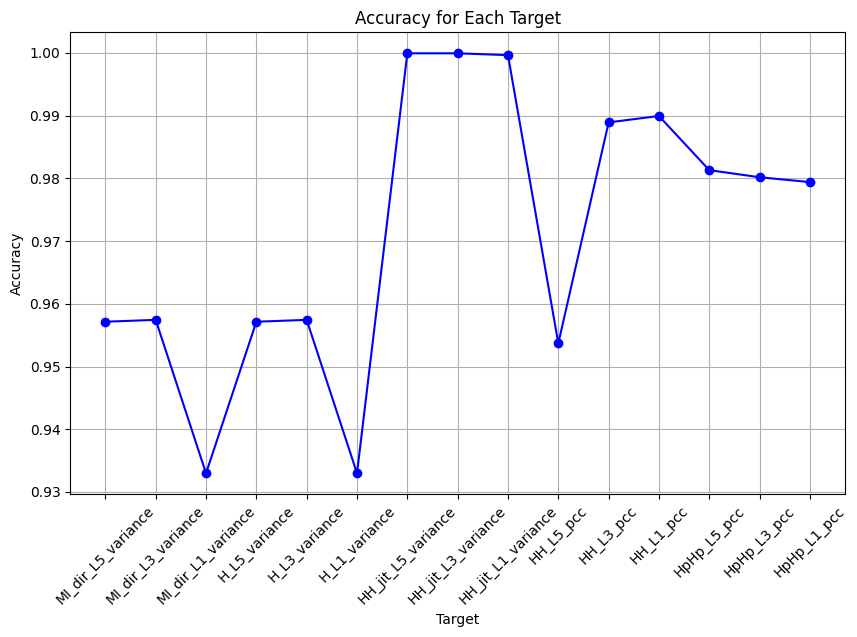

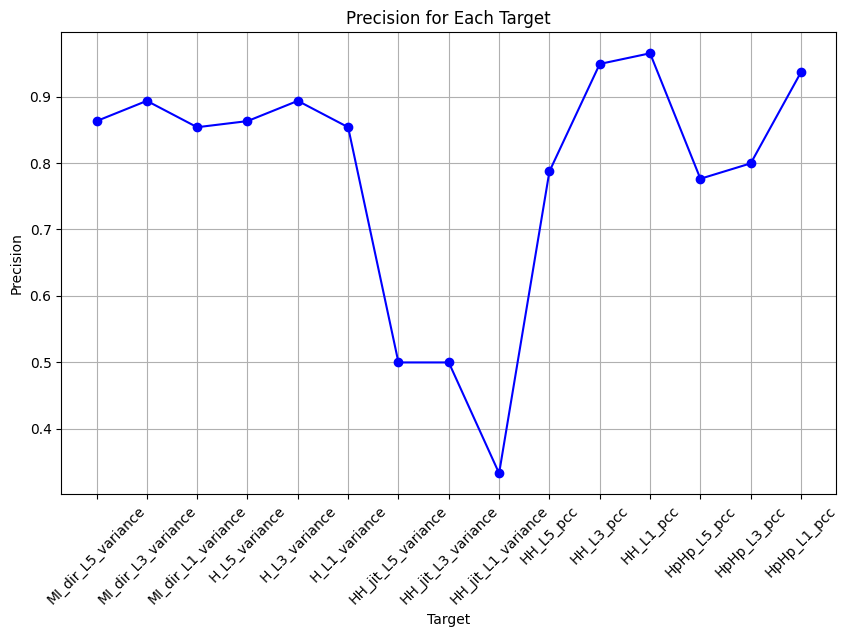

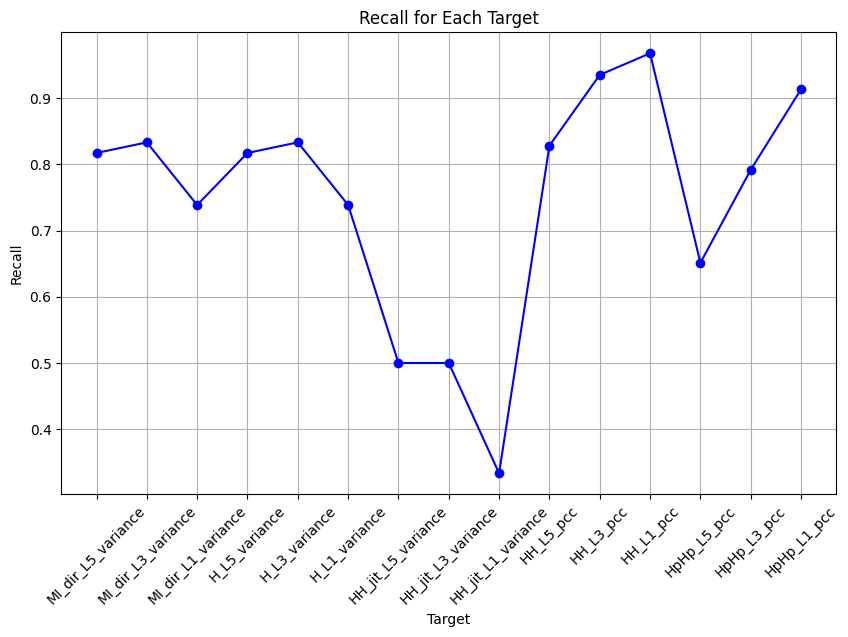

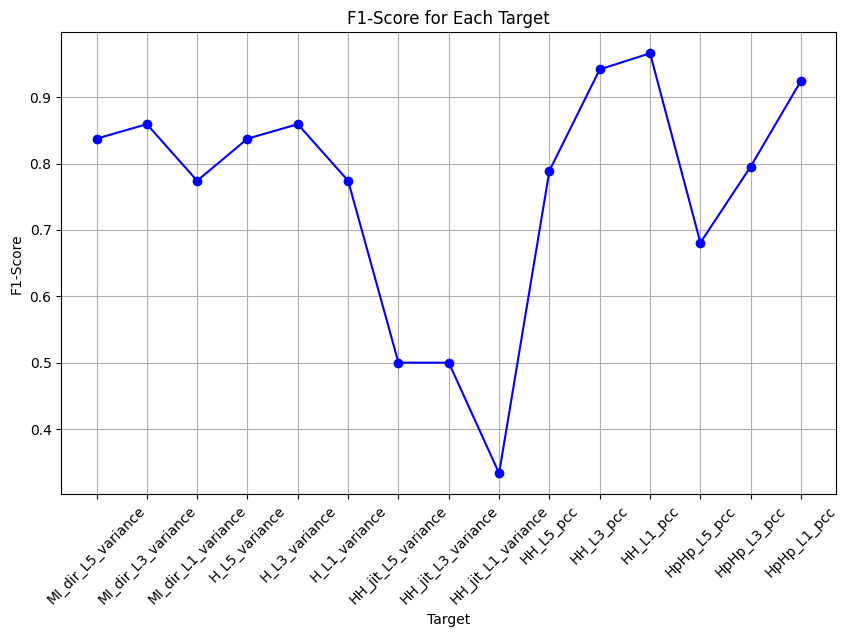

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Ensure target_columns is defined and not empty
if 'target_columns' in locals() and target_columns:
    # Train and evaluate the model for each target column
    for target in target_columns:
        print(f"Training model for target: {target}")

        # Initialize the Random Forest model
        rf_model = DecisionTreeClassifier(random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
        print(f"Cross-Validation Accuracy Scores: {cv_scores}")
        print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

        # Train the model on the full training set
        rf_model.fit(X_train, y_train_binned[target])

        # Predict on the validation set
        y_valid_pred = rf_model.predict(X_valid)

        # Predict on the test set
        y_test_pred = rf_model.predict(X_test)

        # Generate classification performance metrics
        def generate_classification_metrics(y_true, y_pred):
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, average='macro')
            recall = recall_score(y_true, y_pred, average='macro')
            f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
            return accuracy, precision, recall, f1

        print("Validation Set Performance:")
        val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
        print(f"Accuracy: {val_accuracy}")
        print(f"Precision: {val_precision}")
        print(f"Recall: {val_recall}")
        print(f"F1-Score: {val_f1}")

        print("Test Set Performance:")
        test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
        print(f"Accuracy: {test_accuracy}")
        print(f"Precision: {test_precision}")
        print(f"Recall: {test_recall}")
        print(f"F1-Score: {test_f1}")

        print("\n" + "-"*50 + "\n")

        # Append metrics to overall lists
        overall_accuracy.append(test_accuracy)
        overall_precision.append(test_precision)
        overall_recall.append(test_recall)
        overall_f1.append(test_f1)

    # Calculate the overall performance metrics
    avg_accuracy = np.mean(overall_accuracy)
    avg_precision = np.mean(overall_precision)
    avg_recall = np.mean(overall_recall)
    avg_f1 = np.mean(overall_f1)

    print("Overall Performance on Test Set:")
    print(f"Average Accuracy: {avg_accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1-Score: {avg_f1}")

    # Define the plot_metrics function
    def plot_metrics(metrics, metric_name):
        plt.figure(figsize=(10, 6))
        plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
        plt.title(f'{metric_name} for Each Target')
        plt.xlabel('Target')
        plt.ylabel(metric_name)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # Plotting
    plot_metrics(overall_accuracy, 'Accuracy')
    plot_metrics(overall_precision, 'Precision')
    plot_metrics(overall_recall, 'Recall')
    plot_metrics(overall_f1, 'F1-Score')
else:
    print("Error: target_columns is not defined or is empty.")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:2

Training model for target: MI_dir_L5_variance
Cross-Validation Accuracy Scores: [0.97093254 0.97470238 0.97350928 0.97132652 0.97440222]
Mean Cross-Validation Accuracy: 0.9729745880559454
Validation Set Performance:
Accuracy: 0.9660098815405679
Precision: 0.8274337192372269
Recall: 0.8800622341097508
F1-Score: 0.8462404327758831
Test Set Performance:
Accuracy: 0.9614262753735341
Precision: 0.8866893190135161
Recall: 0.8309308060396866
F1-Score: 0.8539150295978866

--------------------------------------------------

Training model for target: MI_dir_L3_variance
Cross-Validation Accuracy Scores: [0.97232143 0.97480159 0.97331084 0.97281476 0.97370771]
Mean Cross-Validation Accuracy: 0.9733912665340634
Validation Set Performance:
Accuracy: 0.9690457765343176
Precision: 0.8827154806032983
Recall: 0.8952898525110257
F1-Score: 0.8887101296993252
Test Set Performance:
Accuracy: 0.9605333650812549
Precision: 0.906355434078855
Recall: 0.8429594968913786
F1-Score: 0.8686691754078596

-----------

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:
Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L3_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Accuracy Scores: [1.         0.99990079 1.         1.         1.        ]
Mean Cross-Validation Accuracy: 0.9999801587301587
Validation Set Performance:
Accuracy: 0.9998809452943628
Precision: 0.33329364843145426
Recall: 0.3333333333333333
F1-Score: 0.3333134897011549
Test Set Performance:
Accuracy: 0.9999404726471813
Precision: 0.49997023632359067
Recall: 0.5
F1-Score: 0.4999851177188439

--------------------------------------------------

Training model for target: HH_jit_L1_variance


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.99970238 0.99960317 0.99980157 0.99980157 0.99970235]
Mean Cross-Validation Accuracy: 0.9997222084421956
Validation Set Performance:
Accuracy: 0.9997023632359069
Precision: 0.33323412107863565
Recall: 0.3333333333333333
F1-Score: 0.3332837198225821
Test Set Performance:
Accuracy: 0.9996428358830883
Precision: 0.3332142786276961
Recall: 0.3333333333333333
F1-Score: 0.3332737953480988

--------------------------------------------------

Training model for target: HH_L5_pcc


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.97986111 0.98065476 0.98233952 0.98144657 0.98085127]
Mean Cross-Validation Accuracy: 0.9810306475667623
Validation Set Performance:
Accuracy: 0.955652122150128
Precision: 0.8342322999172828
Recall: 0.8536336715402429
F1-Score: 0.832589937636849
Test Set Performance:
Accuracy: 0.9592832906720639
Precision: 0.8076233376925331
Recall: 0.8367108708300913
F1-Score: 0.8102947154337948

--------------------------------------------------

Training model for target: HH_L3_pcc
Cross-Validation Accuracy Scores: [0.98968254 0.99156746 0.99236035 0.99047525 0.99136819]
Mean Cross-Validation Accuracy: 0.9910907580117077
Validation Set Performance:
Accuracy: 0.9870825644383594
Precision: 0.9733589941190971
Recall: 0.9050086129149454
F1-Score: 0.9335022112303589
Test Set Performance:
Accuracy: 0.9922614441335794
Precision: 0.9734140448794518
Recall: 0.9398608468163179
F1-Score: 0.9555124117772064

--------------------------------------------------

Training model 

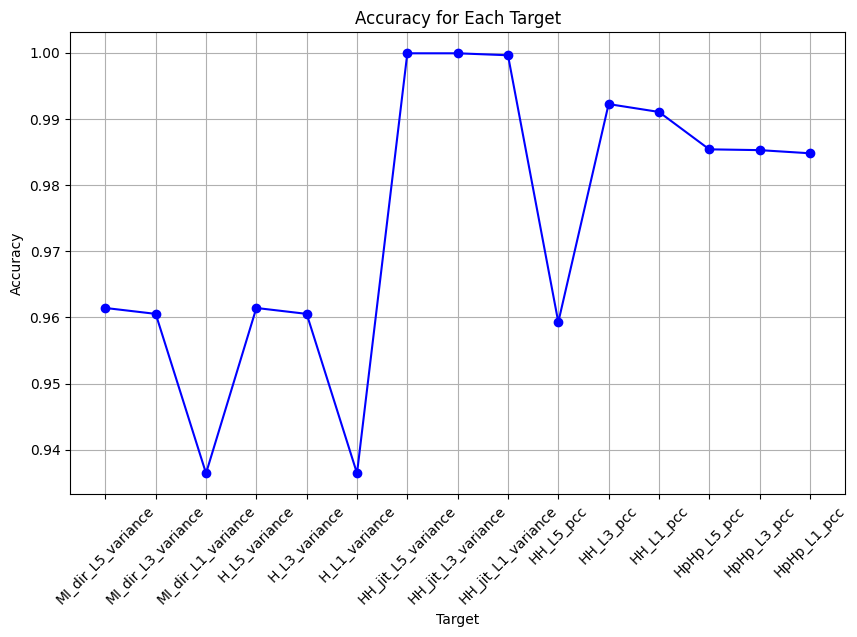

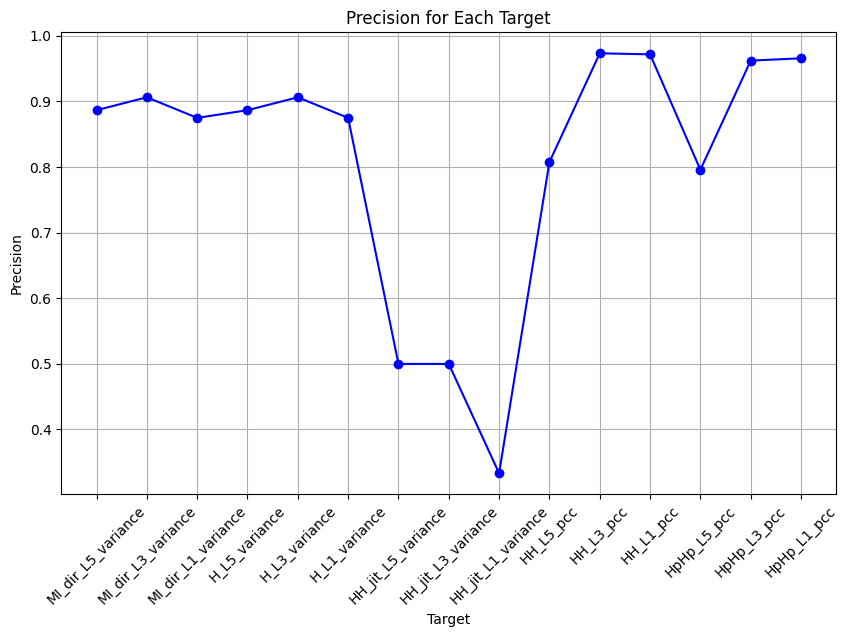

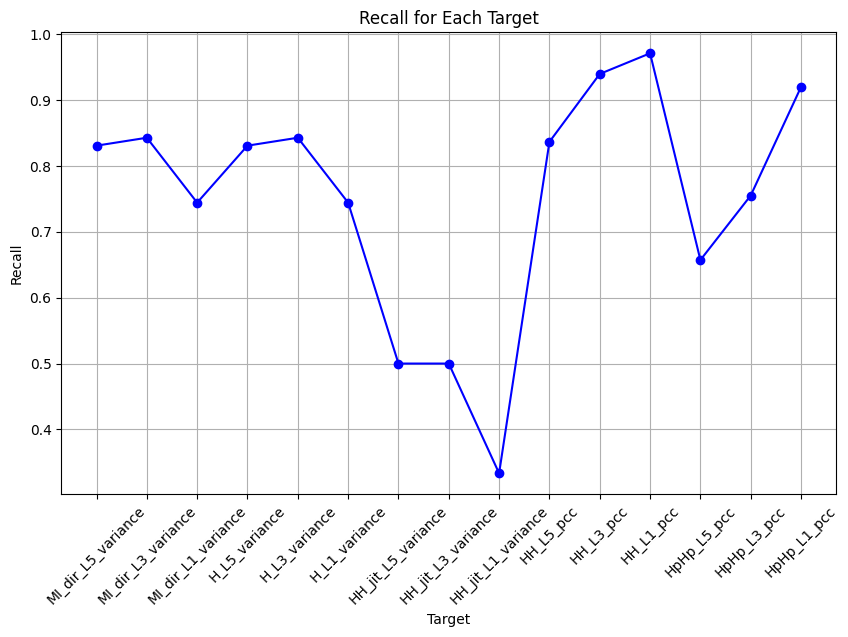

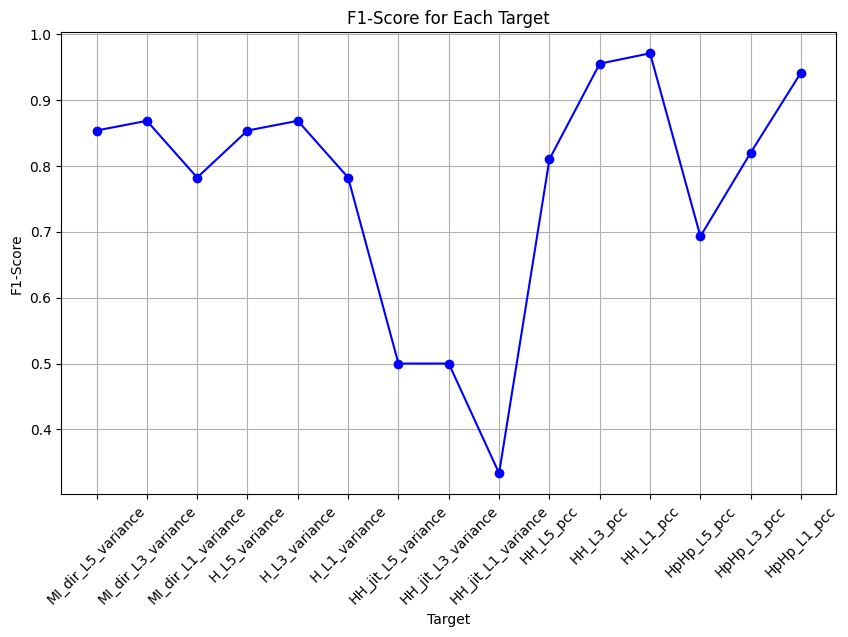

In [ ]:
def bin_targets(y, n_bins=3):
    binned_y = pd.DataFrame()
    for column in y.columns:
        est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        binned_y[column] = est.fit_transform(y[[column]]).astype(int).reshape(-1)
    return binned_y

# Bin the continuous targets
y_train_binned = bin_targets(y_train)
y_valid_binned = bin_targets(y_valid)
y_test_binned = bin_targets(y_test)

# Initialize lists to store the metrics for all target columns
overall_accuracy = []
overall_precision = []
overall_recall = []
overall_f1 = []

# Train and evaluate the model for each target column
for target in target_columns:
    print(f"Training model for target: {target}")

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(rf_model, X_train, y_train_binned[target], cv=5, scoring='accuracy')
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

    # Train the model on the full training set
    rf_model.fit(X_train, y_train_binned[target])

    # Predict on the validation set
    y_valid_pred = rf_model.predict(X_valid)

    # Predict on the test set
    y_test_pred = rf_model.predict(X_test)

    # Generate classification performance metrics
    def generate_classification_metrics(y_true, y_pred):
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='macro')
        recall = recall_score(y_true, y_pred, average='macro')
        f1 = f1_score(y_true, y_pred, average='macro')  # Ensure f1_score function is used
        return accuracy, precision, recall, f1

    print("Validation Set Performance:")
    val_accuracy, val_precision, val_recall, val_f1 = generate_classification_metrics(y_valid_binned[target], y_valid_pred)
    print(f"Accuracy: {val_accuracy}")
    print(f"Precision: {val_precision}")
    print(f"Recall: {val_recall}")
    print(f"F1-Score: {val_f1}")

    print("Test Set Performance:")
    test_accuracy, test_precision, test_recall, test_f1 = generate_classification_metrics(y_test_binned[target], y_test_pred)
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1-Score: {test_f1}")

    print("\n" + "-"*50 + "\n")

    # Append metrics to overall lists
    overall_accuracy.append(test_accuracy)
    overall_precision.append(test_precision)
    overall_recall.append(test_recall)
    overall_f1.append(test_f1)

# Calculate the overall performance metrics
avg_accuracy = np.mean(overall_accuracy)
avg_precision = np.mean(overall_precision)
avg_recall = np.mean(overall_recall)
avg_f1 = np.mean(overall_f1)

print("Overall Performance on Test Set:")
print(f"Average Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1-Score: {avg_f1}")

# Define the plot_metrics function
def plot_metrics(metrics, metric_name):
    plt.figure(figsize=(10, 6))
    plt.plot(target_columns, metrics, marker='o', linestyle='-', color='b')
    plt.title(f'{metric_name} for Each Target')
    plt.xlabel('Target')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting
plot_metrics(overall_accuracy, 'Accuracy')
plot_metrics(overall_precision, 'Precision')
plot_metrics(overall_recall, 'Recall')
plot_metrics(overall_f1, 'F1-Score')

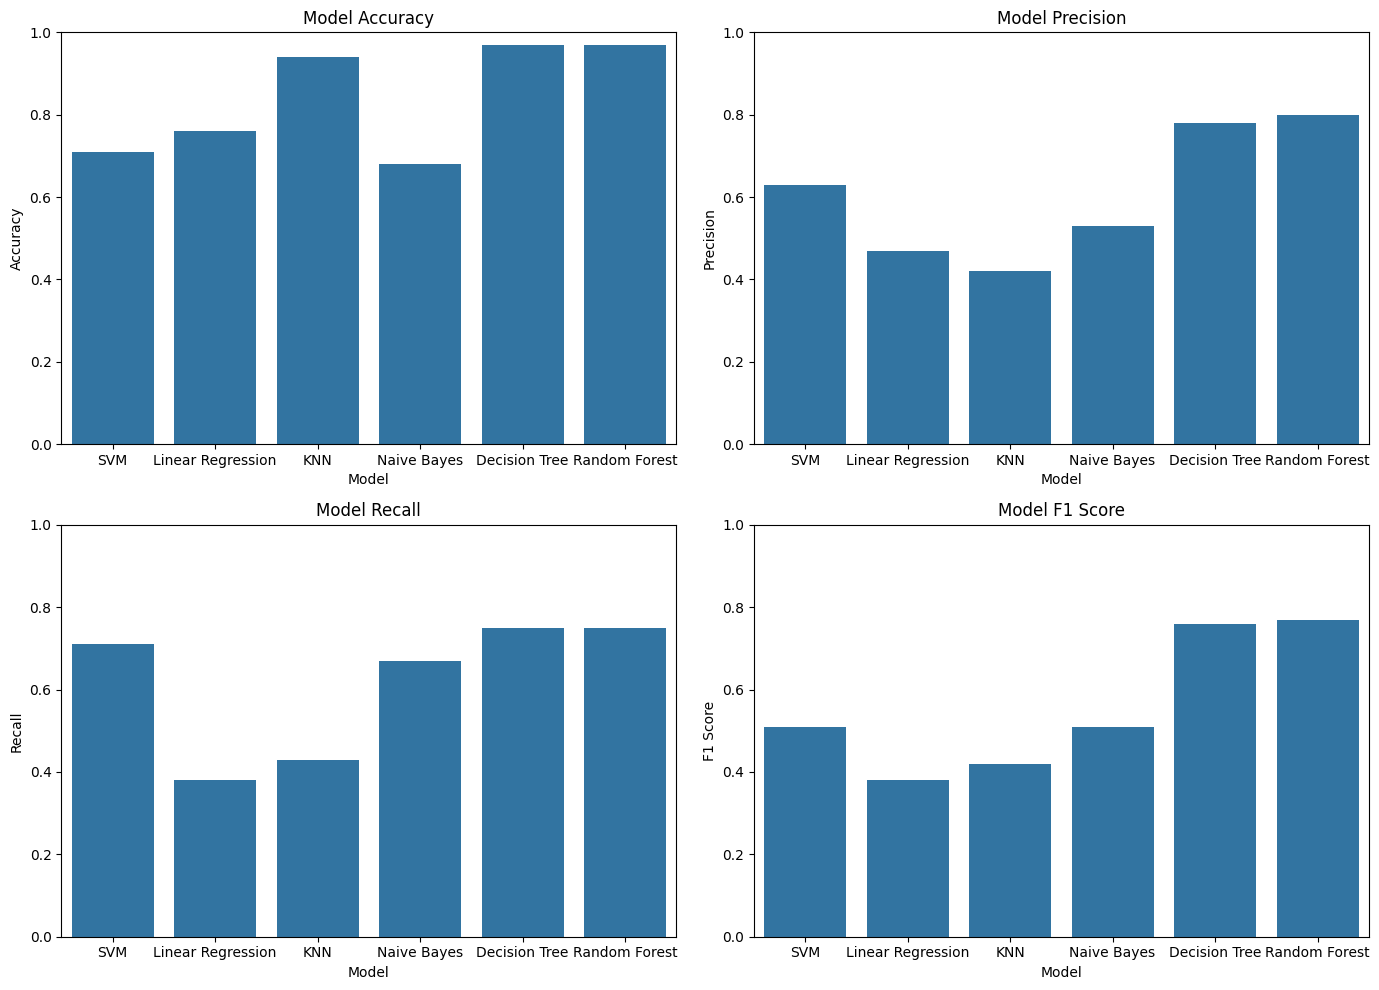

In [ ]:
data = {
    'Model': ['SVM', 'Linear Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.71, 0.76, 0.94, 0.68, 0.97, 0.97],
    'Precision': [0.63, 0.47, 0.42,0.53 ,0.78, 0.80],
    'Recall': [0.71, 0.38, 0.43, 0.67, 0.75, 0.75],
    'F1 Score': [0.51, 0.38, 0.42, 0.51, 0.76, 0.77]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 10))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Model Accuracy')
plt.ylim(0, 1)

# Plot Precision
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Model Precision')
plt.ylim(0, 1)

# Plot Recall
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Model Recall')
plt.ylim(0, 1)

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=df)
plt.title('Model F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()